In [1]:
import os
import sys
import re
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import copy
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../../statmechlib')
from statmechlib.read_write import read_vasp
from statmechlib.preprocessing import Trajectory

In [4]:
target_raw = '../data/target_raw'
target_proc = '../data/target_processed'
working = '../data/working'

datasets = ['bcc_npt_langevin_300K',
            'fcc_npt_langevin_300K',
            'vac_npt_langevin_2000K',
            'i110_npt_langevin_2000K',
            'i111_npt_langevin_2000K',
            'screw_111_npt_langevin_2000K',
            'bcc_npt_langevin_3700K',
            'liq_3700K',
            'liq_5000K']

datasets_0k = ['bcc_0k',
               'fcc_0k',
               'vac_0k',
               'i110_0k',
               'i111_0k',
               'screw_111_0k']

In [5]:
#with open(os.path.join(target_proc,  "datasets.pickle"), 'wb') as fo:
#    pickle.dump(datasets, fo)
#
#print(datasets)

In [6]:
trajdirs = [target_raw + '/' + dataset for dataset in datasets]
trajdirs_0k = [target_raw + '/' + dataset for dataset in datasets_0k]

In [7]:
trajectories = {}
for name, traj_path in zip(datasets, trajdirs):
    trajectories[name] = read_vasp(traj_path)

Reading ../data/target_raw/bcc_npt_langevin_300K/OUTCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/POSCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/CONTCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/XDATCAR
Reading ../data/target_raw/bcc_npt_langevin_300K/OSZICAR
Reading ../data/target_raw/bcc_npt_langevin_300K/INCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/OUTCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/POSCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/CONTCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/XDATCAR
Reading ../data/target_raw/fcc_npt_langevin_300K/OSZICAR
Reading ../data/target_raw/fcc_npt_langevin_300K/INCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/OUTCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/POSCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/CONTCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/XDATCAR
Reading ../data/target_raw/vac_npt_langevin_2000K/OSZICAR
Reading ../data/target_raw/vac_npt_l

In [8]:
trajectories_0k = {}
for name, traj_path in zip(datasets_0k, trajdirs_0k):
    trajectories_0k[name] = read_vasp(traj_path)

Reading ../data/target_raw/bcc_0k/OUTCAR
Reading ../data/target_raw/bcc_0k/POSCAR
Reading ../data/target_raw/bcc_0k/CONTCAR
Reading ../data/target_raw/bcc_0k/XDATCAR
Reading ../data/target_raw/bcc_0k/OSZICAR
Reading ../data/target_raw/bcc_0k/INCAR
Reading ../data/target_raw/fcc_0k/OUTCAR
Reading ../data/target_raw/fcc_0k/POSCAR
Reading ../data/target_raw/fcc_0k/CONTCAR
Reading ../data/target_raw/fcc_0k/OSZICAR
Reading ../data/target_raw/fcc_0k/INCAR
Reading ../data/target_raw/vac_0k/OUTCAR
Reading ../data/target_raw/vac_0k/POSCAR
Reading ../data/target_raw/vac_0k/CONTCAR
Reading ../data/target_raw/vac_0k/OSZICAR
Reading ../data/target_raw/vac_0k/INCAR
Reading ../data/target_raw/i110_0k/OUTCAR
Reading ../data/target_raw/i110_0k/POSCAR
Reading ../data/target_raw/i110_0k/CONTCAR
Reading ../data/target_raw/i110_0k/XDATCAR
Reading ../data/target_raw/i110_0k/OSZICAR
Reading ../data/target_raw/i110_0k/INCAR
Reading ../data/target_raw/i111_0k/OUTCAR
Reading ../data/target_raw/i111_0k/POSCAR
Re

In [737]:
# Convert MD trajectory dicts to objects
trjs = {}
for k, trj in trajectories.items():
    trjs[k] = Trajectory(trj, inplace=False)

In [738]:
# Convert MD trajectory 0K configs to objects
trjs_0k = {}
for k, trj in trajectories_0k.items():
    trjs_0k[k] = Trajectory(trj, inplace=False)[-1]

In [739]:
# join 0 K configurations into a pseudo-trajectory
traj0k = copy.deepcopy(trjs_0k['bcc_0k'])

for k, trj in trjs_0k.items():
    print(k)
    if 'bcc' not in k:
        traj0k.append(trj)
    print(len(traj0k['box']))

bcc_0k
1
fcc_0k
2
vac_0k
3
i110_0k
4
i111_0k
5
screw_111_0k
6


In [740]:
traj0k['energy']

[-1656.1778, -790.30178, -1640.1278, -1657.4853, -1657.8379, -1735.6497]

In [741]:
(-1657.4853 + 1657.8379)

0.3525999999999385

In [742]:
ubcc = -1656.1778

(-1640.1278 - ubcc*127/128)

3.111110937499916

In [743]:
# Create an artificial configuration with large box and 0 energy
traj_inf = copy.deepcopy(trjs_0k['bcc_0k'])

In [744]:
def make_infinite_conf(trj):
    """
    Scales box size by 10 to separate all atoms beyond cutoff, and sets energies and forces to 0.
    
    Parameters
    ----------
    trj: Trajectory object (or dict)
         Trajectory to be rescaled
    
    Returns
    -------
    trj: Trajectory object (or dict)
         Rescaled trajectory
    """
    trj['box'][0] = trj['box'][0]*10
    trj['box0'] = trj['box0']*10
    trj['energy'][0] = 0.0
    trj['free_energy'][0] = 0.0
    trj['total_energy'][0] = 0.0
    trj['forces'][0] = np.zeros_like(trj['forces'][0])
    return trj

In [745]:
traj_inf = make_infinite_conf(traj_inf)

In [746]:
traj_inf['box0']

array([[127.48742045,   0.        ,   0.        ],
       [  0.        , 127.48742045,   0.        ],
       [  0.        ,   0.        , 127.48742045]])

In [747]:
traj0k['temp'] = [300.0 for _ in range(len(traj0k['temp']))]

In [748]:
traj0k.append(traj_inf)

In [749]:
trjs['relax'] = traj0k

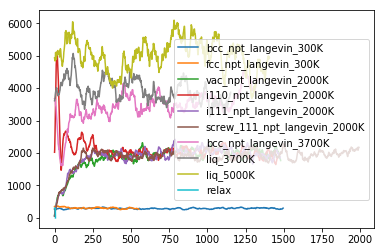

In [750]:
for key, trj in trjs.items():
    #print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['temp']))
    plt.plot(trj['temp'], label=key)

plt.legend()
plt.show()

In [751]:
def get_msd(xyzs):
    """Return mean squared displacement (msd) for a given trajectory (traj)."""
    msd = []
    for rs in xyzs:
        msd.append(np.mean((rs - xyzs[0])**2))
    #msd = [0.0 for _ in range(len(xyzs))]
    return np.array(msd)

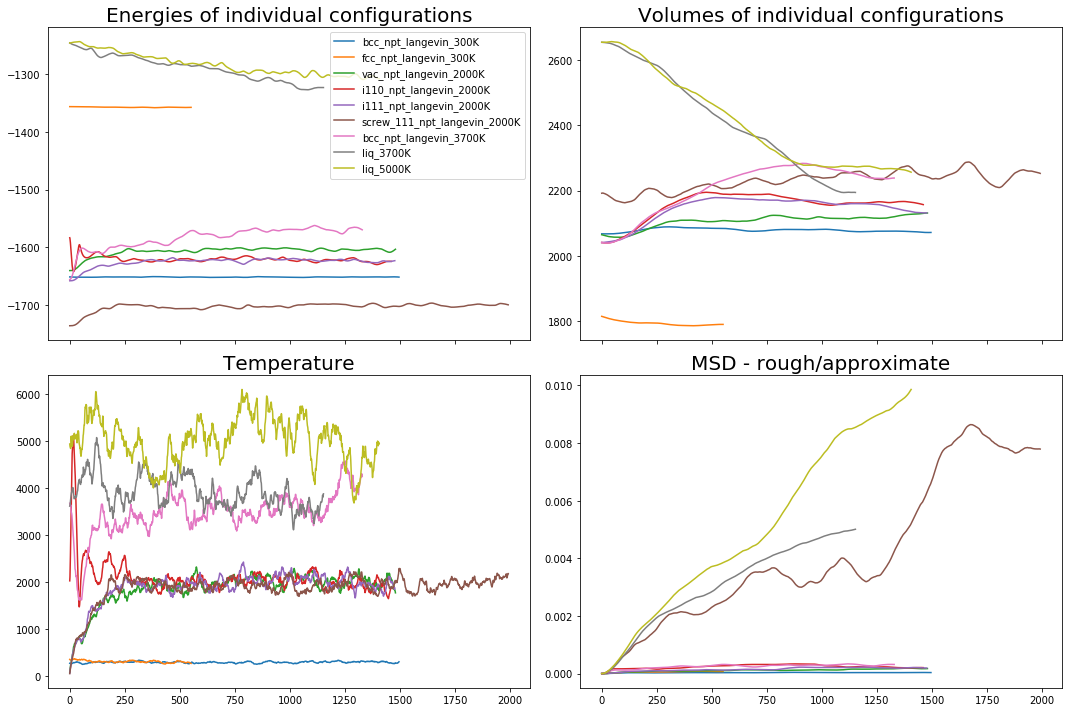

In [752]:
fig, axes = plt.subplots(2, 2, sharex='col', figsize=(15,10))

for key, traj in trjs.items():
    if 'relax' in key:
        continue

        
    #axes[0,0].plot([e/x.shape[0] for e, x in zip(traj['energy'], traj['xyz'])], label=dset)
    if 'screw' in key:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)
    else:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)


    axes[1,0].plot([t for t in traj['temp']], label=key)

    msd = get_msd(traj['xyz'])
    axes[1,1].plot(msd, label=key)

axes[0,0].legend()
axes[0,0].set_title('Energies of individual configurations', fontsize=20)
axes[0,1].set_title('Volumes of individual configurations', fontsize=20)       
axes[1,0].set_title('Temperature', fontsize=20)
axes[1,1].set_title('MSD - rough/approximate', fontsize=20)
fig.tight_layout()

In [753]:
[(k, len(v['energy'])) for k, v in trjs.items()]

[('bcc_npt_langevin_300K', 1496),
 ('fcc_npt_langevin_300K', 552),
 ('vac_npt_langevin_2000K', 1480),
 ('i110_npt_langevin_2000K', 1461),
 ('i111_npt_langevin_2000K', 1477),
 ('screw_111_npt_langevin_2000K', 1992),
 ('bcc_npt_langevin_3700K', 1329),
 ('liq_3700K', 1153),
 ('liq_5000K', 1406),
 ('relax', 7)]

In [757]:
cuts = {'bcc_npt_langevin_300K':100,
        'fcc_npt_langevin_300K':50,
        'vac_npt_langevin_2000K':300,
        'i110_npt_langevin_2000K':700,
        'i111_npt_langevin_2000K':700,
        'screw_111_npt_langevin_2000K':1000,
        'bcc_npt_langevin_3700K':500,
        'liq_3700K':800,
        'liq_5000K':800,
        'relax':0}

In [758]:
trj_samples = {}
for key, traj in trjs.items():
    if 'relax' not in key:
        trj_samples[key] = traj[cuts[key]::5]
    else:
        trj_samples[key] = traj[cuts[key]:]

In [759]:
[(k, len(v['energy'])) for k, v in trj_samples.items()]

[('bcc_npt_langevin_300K', 280),
 ('fcc_npt_langevin_300K', 101),
 ('vac_npt_langevin_2000K', 236),
 ('i110_npt_langevin_2000K', 153),
 ('i111_npt_langevin_2000K', 156),
 ('screw_111_npt_langevin_2000K', 199),
 ('bcc_npt_langevin_3700K', 166),
 ('liq_3700K', 71),
 ('liq_5000K', 122),
 ('relax', 7)]

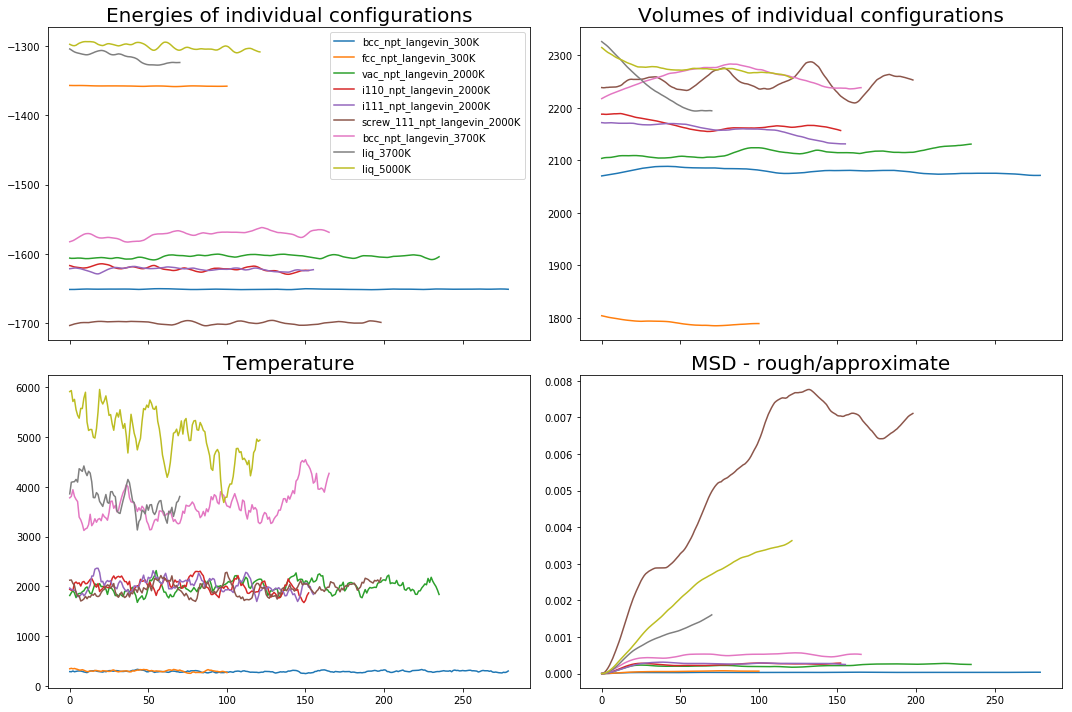

In [760]:
fig, axes = plt.subplots(2, 2, sharex='col', figsize=(15,10))

for key, traj in trj_samples.items():
    if 'relax' in key:
        continue

        
    #axes[0,0].plot([e/x.shape[0] for e, x in zip(traj['energy'], traj['xyz'])], label=dset)
    if 'screw' in key:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)
    else:
        axes[0,0].plot([e for e, x in zip(traj['energy'], traj['xyz'])], label=key)
        axes[0,1].plot([np.linalg.det(b) for b in traj['box']], label=key)


    axes[1,0].plot([t for t in traj['temp']], label=key)

    msd = get_msd(traj['xyz'])
    axes[1,1].plot(msd, label=key)

axes[0,0].legend()
axes[0,0].set_title('Energies of individual configurations', fontsize=20)
axes[0,1].set_title('Volumes of individual configurations', fontsize=20)       
axes[1,0].set_title('Temperature', fontsize=20)
axes[1,1].set_title('MSD - rough/approximate', fontsize=20)
fig.tight_layout()

In [761]:
weights = {k:1.0 for k in trj_samples}
weights['relax'] = 10.0

target_data = {}

for key, trj in trj_samples.items():
    
    print('dataset #', key)

    # target data
    target_dict = {'type':'trajectory', 'weight':weights[key]}
    target_dict['box'] = trj['box']
    target_dict['xyz'] = trj['xyz']
    target_dict['energy'] = trj['energy']
    target_dict['temp'] = trj['temp']

    # save inverse temperature data (if T=0, set beta=1/300)
    target_dict['beta'] = np.empty_like(target_dict['temp'])
    for i, temp in enumerate(target_dict['temp']):
        if temp == 0.0:
            target_dict['beta'][i] = 1.0/300.0
        else:
            target_dict['beta'][i] = 1.0/temp
            
    target_data[key] = target_dict

dataset # bcc_npt_langevin_300K
dataset # fcc_npt_langevin_300K
dataset # vac_npt_langevin_2000K
dataset # i110_npt_langevin_2000K
dataset # i111_npt_langevin_2000K
dataset # screw_111_npt_langevin_2000K
dataset # bcc_npt_langevin_3700K
dataset # liq_3700K
dataset # liq_5000K
dataset # relax


In [762]:
from statmechlib.preprocessing import pair_dist, get_stats_EAM, get_stats_EAM_pairdist

In [299]:
%%writefile -a ../../statmechlib/statmechlib/preprocessing/stats.py

def get_stats(stats_func, trj_samples, params):
    """
    Calculates statisitics for a given trajectory and hyperparameters.
    
    Parameters
    ----------
    stats_func: function
                calculates statistics for a single configuration
    trj_samples: dict
                set of trajectories (list of box parameters and particle configurations)
    params: list of floats
            hyperparameters (e.g., functional form of the potential)
            
    Returns
    -------
    stats_data: dict
            relevant trajectory statistics and the corresponding hyperparamters
    """

    stats_data = {}

    for key, trj in trj_samples.items():
    
        stats_dict = {'energy':[]}
        
        for ii, (xyz, box) in enumerate(zip(trj['xyz'], trj['box'])):
        
            a1, ar, a2, f1, fr, f2 = stats_func(xyz, box, params)

            stats_dict['energy'].append(np.array([ar, a2, a1]))

        stats_data[key] = stats_dict
    
    stats_data['hyperparams'] = sc
    
    return stats_data

Appending to ../../statmechlib/statmechlib/preprocessing/stats.py


dataset # bcc_npt_langevin_300K
conf 0
x (6,) [4.92773772e-01 1.27049732e+02 4.16569825e+02 8.31729592e+02
 1.34753150e+03 1.97779799e+03] [5.45347918e-03 1.26287702e+02 1.35605112e+03 5.40500560e+03
 1.41869678e+04 3.05609371e+04] [1.29710673e-06 1.25313402e+02 1.43808135e+04 2.28322905e+05
 1.57273655e+06 7.29750633e+06]
conf 1
x (6,) [4.76197959e-01 1.26960805e+02 4.16422207e+02 8.31539602e+02
 1.34729327e+03 1.97749336e+03] [5.36809619e-03 1.26107536e+02 1.35508200e+03 5.40252269e+03
 1.41819337e+04 3.05515052e+04] [1.37664689e-06 1.24941781e+02 1.43599083e+04 2.28110795e+05
 1.57161238e+06 7.29298499e+06]
conf 2
x (6,) [4.69818463e-01 1.26888949e+02 4.16275108e+02 8.31338791e+02
 1.34703747e+03 1.97716419e+03] [5.40533980e-03 1.25959290e+02 1.35411544e+03 5.39990158e+03
 1.41765350e+04 3.05413225e+04] [1.89916665e-06 1.24624676e+02 1.43390196e+04 2.27887423e+05
 1.57040973e+06 7.28811217e+06]
conf 3
x (6,) [4.76235694e-01 1.26844295e+02 4.16153753e+02 8.31161925e+02
 1.34680788e+0

x (6,) [4.62709792e-01 1.24643487e+02 4.12186202e+02 8.25846494e+02
 1.34009077e+03 1.96827126e+03] [5.22454936e-03 1.21539239e+02 1.32764089e+03 5.32877464e+03
 1.40306588e+04 3.02671263e+04] [1.09681140e-06 1.16033687e+02 1.37837497e+04 2.21921686e+05
 1.53824215e+06 7.15776612e+06]
conf 29
x (6,) [4.57955939e-01 1.24602639e+02 4.12083675e+02 8.25702356e+02
 1.33990507e+03 1.96803232e+03] [5.48755999e-03 1.21456913e+02 1.32698594e+03 5.32693024e+03
 1.40267970e+04 3.02598175e+04] [1.33317325e-06 1.15866187e+02 1.37703805e+04 2.21770698e+05
 1.53740718e+06 7.15434717e+06]
conf 30
x (6,) [4.46991955e-01 1.24549838e+02 4.11972906e+02 8.25555506e+02
 1.33972107e+03 1.96779890e+03] [5.78882130e-03 1.21353707e+02 1.32628329e+03 5.32506018e+03
 1.40229860e+04 3.02527034e+04] [1.83861745e-06 1.15667952e+02 1.37562478e+04 2.21619147e+05
 1.53659008e+06 7.15104402e+06]
conf 31
x (6,) [4.34710036e-01 1.24495983e+02 4.11860279e+02 8.25406366e+02
 1.33953647e+03 1.96756661e+03] [5.92617236e-03 1.

x (6,) [5.81789328e-01 1.24755005e+02 4.12254179e+02 8.25832184e+02
 1.34007618e+03 1.96825141e+03] [8.46449873e-03 1.21841627e+02 1.32827906e+03 5.32891877e+03
 1.40308203e+04 3.02671331e+04] [4.60243396e-06 1.16909500e+02 1.38050494e+04 2.21987404e+05
 1.53847951e+06 7.15834695e+06]
conf 57
x (6,) [5.93974939e-01 1.24750680e+02 4.12265640e+02 8.25850700e+02
 1.34010432e+03 1.96829254e+03] [9.64463994e-03 1.21833399e+02 1.32834801e+03 5.32914646e+03
 1.40313937e+04 3.02683812e+04] [7.34899610e-06 1.16896274e+02 1.38062869e+04 2.22004510e+05
 1.53859833e+06 7.15892147e+06]
conf 58
x (6,) [5.91940011e-01 1.24737787e+02 4.12263341e+02 8.25852498e+02
 1.34011144e+03 1.96830705e+03] [1.02869666e-02 1.21805069e+02 1.32832089e+03 5.32914756e+03
 1.40315128e+04 3.02687938e+04] [9.54097050e-06 1.16832025e+02 1.38052240e+04 2.22000944e+05
 1.53861132e+06 7.15908456e+06]
conf 59
x (6,) [5.87281528e-01 1.24734285e+02 4.12269489e+02 8.25864470e+02
 1.34012924e+03 1.96833335e+03] [1.04156438e-02 1.

x (6,) [4.29905349e-01 1.24720226e+02 4.12518661e+02 8.26370418e+02
 1.34080096e+03 1.96921047e+03] [5.58100784e-03 1.21722316e+02 1.32985334e+03 5.33564145e+03
 1.40456834e+04 3.02962277e+04] [2.05865551e-06 1.16506909e+02 1.38325909e+04 2.22511080e+05
 1.54160348e+06 7.17173364e+06]
conf 85
x (6,) [4.71028084e-01 1.24741504e+02 4.12521589e+02 8.26357912e+02
 1.34078285e+03 1.96918623e+03] [7.07460095e-03 1.21763637e+02 1.32986804e+03 5.33547393e+03
 1.40452963e+04 3.02954702e+04] [3.73600435e-06 1.16586101e+02 1.38327336e+04 2.22496139e+05
 1.54151519e+06 7.17136439e+06]
conf 86
x (6,) [4.92646326e-01 1.24779181e+02 4.12556817e+02 8.26387912e+02
 1.34081733e+03 1.96922967e+03] [8.01266080e-03 1.21835522e+02 1.33009035e+03 5.33585546e+03
 1.40460114e+04 3.02967960e+04] [5.02861589e-06 1.16716952e+02 1.38371619e+04 2.22527001e+05
 1.54166900e+06 7.17198178e+06]
conf 87
x (6,) [4.96094161e-01 1.24835736e+02 4.12615870e+02 8.26447469e+02
 1.34088657e+03 1.96931609e+03] [8.29272706e-03 1.

x (6,) [5.68567173e-01 1.26152170e+02 4.14917379e+02 8.29560871e+02
 1.34482104e+03 1.97434953e+03] [6.78397167e-03 1.24504124e+02 1.34527957e+03 5.37678766e+03
 1.41298453e+04 3.04542989e+04] [1.47880376e-06 1.21778106e+02 1.41518513e+04 2.25933985e+05
 1.56005016e+06 7.24651664e+06]
conf 113
x (6,) [6.01469873e-01 1.26213830e+02 4.14995789e+02 8.29658240e+02
 1.34494223e+03 1.97450568e+03] [7.55189202e-03 1.24624737e+02 1.34579375e+03 5.37806378e+03
 1.41324168e+04 3.04591591e+04] [1.86334989e-06 1.22009590e+02 1.41629155e+04 2.26043592e+05
 1.56062900e+06 7.24887037e+06]
conf 114
x (6,) [6.19437025e-01 1.26273915e+02 4.15072382e+02 8.29751793e+02
 1.34505735e+03 1.97465249e+03] [8.33106215e-03 1.24743665e+02 1.34630026e+03 5.37929771e+03
 1.41348710e+04 3.04637439e+04] [2.67664396e-06 1.22243030e+02 1.41739813e+04 2.26150830e+05
 1.56118638e+06 7.25110522e+06]
conf 115
x (6,) [6.26705524e-01 1.26322774e+02 4.15140077e+02 8.29835962e+02
 1.34516166e+03 1.97478524e+03] [9.15106173e-03

x (6,) [5.46955686e-01 1.25421628e+02 4.13665273e+02 8.27923610e+02
 1.34274321e+03 1.97169074e+03] [6.40134518e-03 1.23033737e+02 1.33711128e+03 5.35549323e+03
 1.40860907e+04 3.03721656e+04] [1.53545731e-06 1.18795454e+02 1.39779570e+04 2.24132514e+05
 1.55034788e+06 7.20732543e+06]
conf 141
x (6,) [5.76842998e-01 1.25404482e+02 4.13609609e+02 8.27841203e+02
 1.34264081e+03 1.97155799e+03] [7.18346472e-03 1.23005763e+02 1.33676154e+03 5.35444192e+03
 1.40839629e+04 3.03681044e+04] [1.77987509e-06 1.18761949e+02 1.39710574e+04 2.24046976e+05
 1.54988862e+06 7.20542498e+06]
conf 142
x (6,) [6.23338470e-01 1.25412234e+02 4.13574039e+02 8.27775173e+02
 1.34255615e+03 1.97144625e+03] [8.32754789e-03 1.23029004e+02 1.33654476e+03 5.35360671e+03
 1.40822130e+04 3.03646975e+04] [2.26274563e-06 1.18836317e+02 1.39670600e+04 2.23980196e+05
 1.54951483e+06 7.20384177e+06]
conf 143
x (6,) [6.77945446e-01 1.25436764e+02 4.13565839e+02 8.27741187e+02
 1.34251091e+03 1.97138410e+03] [9.63692698e-03

x (6,) [5.76266445e-01 1.25655105e+02 4.13876190e+02 8.28073898e+02
 1.34290052e+03 1.97187650e+03] [7.02011414e-03 1.23534298e+02 1.33856227e+03 5.35756770e+03
 1.40895656e+04 3.03781049e+04] [1.97570932e-06 1.19931223e+02 1.40119711e+04 2.24327995e+05
 1.55118978e+06 7.21035029e+06]
conf 169
x (6,) [5.41076366e-01 1.25630601e+02 4.13851588e+02 8.28056194e+02
 1.34288535e+03 1.97186328e+03] [6.83394207e-03 1.23486884e+02 1.33841033e+03 5.35735416e+03
 1.40892730e+04 3.03777365e+04] [2.02624045e-06 1.19842192e+02 1.40090890e+04 2.24312707e+05
 1.55113664e+06 7.21021223e+06]
conf 170
x (6,) [5.10632056e-01 1.25601296e+02 4.13811630e+02 8.28014549e+02
 1.34283885e+03 1.97180788e+03] [6.74565238e-03 1.23432121e+02 1.33816441e+03 5.35683975e+03
 1.40883353e+04 3.03760840e+04] [2.27707856e-06 1.19745711e+02 1.40044527e+04 2.24273673e+05
 1.55094676e+06 7.20947909e+06]
conf 171
x (6,) [4.99135478e-01 1.25573469e+02 4.13772652e+02 8.27970740e+02
 1.34278944e+03 1.97174749e+03] [7.03811211e-03

x (6,) [5.00958229e-01 1.25716520e+02 4.14227824e+02 8.28667692e+02
 1.34368614e+03 1.97289091e+03] [8.32764423e-03 1.23656289e+02 1.34087170e+03 5.36532690e+03
 1.41061816e+04 3.04095918e+04] [5.63705377e-06 1.20168936e+02 1.40617353e+04 2.24990213e+05
 1.55490529e+06 7.22551561e+06]
conf 197
x (6,) [4.91089298e-01 1.25817577e+02 4.14381082e+02 8.28854212e+02
 1.34391490e+03 1.97318010e+03] [7.44785921e-03 1.23858227e+02 1.34188242e+03 5.36777678e+03
 1.41110373e+04 3.04185836e+04] [3.81878927e-06 1.20573978e+02 1.40837237e+04 2.25201539e+05
 1.55599923e+06 7.22986194e+06]
conf 198
x (6,) [4.80124558e-01 1.25905488e+02 4.14510085e+02 8.29010116e+02
 1.34410650e+03 1.97342305e+03] [6.73055116e-03 1.24036494e+02 1.34273977e+03 5.36983452e+03
 1.41151181e+04 3.04261558e+04] [2.45117553e-06 1.20941665e+02 1.41026529e+04 2.25380734e+05
 1.55692473e+06 7.23353992e+06]
conf 199
x (6,) [4.71521261e-01 1.25994084e+02 4.14638436e+02 8.29163656e+02
 1.34429605e+03 1.97366389e+03] [6.07519556e-03

x (6,) [4.43975057e-01 1.26203776e+02 4.15325916e+02 8.30135792e+02
 1.34554274e+03 1.97528143e+03] [4.06576916e-03 1.24626562e+02 1.34798886e+03 5.38434415e+03
 1.41451597e+04 3.04832481e+04] [6.41791230e-07 1.22095105e+02 1.42113680e+04 2.26586408e+05
 1.56349741e+06 7.26048383e+06]
conf 225
x (6,) [4.80842020e-01 1.26175603e+02 4.15270016e+02 8.30062600e+02
 1.34545451e+03 1.97517140e+03] [4.83596251e-03 1.24586207e+02 1.34765865e+03 5.38344244e+03
 1.41433687e+04 3.04799342e+04] [7.64438651e-07 1.22076546e+02 1.42057916e+04 2.26518586e+05
 1.56312979e+06 7.25898339e+06]
conf 226
x (6,) [5.19297848e-01 1.26168285e+02 4.15228707e+02 8.30001140e+02
 1.34537769e+03 1.97507282e+03] [5.95233541e-03 1.24587505e+02 1.34742590e+03 5.38269814e+03
 1.41418251e+04 3.04769839e+04] [1.20706058e-06 1.22141472e+02 1.42023792e+04 2.26464863e+05
 1.56282021e+06 7.25766608e+06]
conf 227
x (6,) [5.59619962e-01 1.26162940e+02 4.15175963e+02 8.29918735e+02
 1.34527293e+03 1.97493673e+03] [7.23804467e-03

x (6,) [6.40588525e-01 1.26436688e+02 4.15231781e+02 8.29872605e+02
 1.34516152e+03 1.97476674e+03] [9.17761040e-03 1.25098428e+02 1.34742565e+03 5.38101348e+03
 1.41372783e+04 3.04675899e+04] [3.64809401e-06 1.23059180e+02 1.42014225e+04 2.26319745e+05
 1.56181308e+06 7.25323875e+06]
conf 253
x (6,) [6.25807031e-01 1.26464191e+02 4.15274401e+02 8.29927540e+02
 1.34523082e+03 1.97485474e+03] [8.48225676e-03 1.25144218e+02 1.34769231e+03 5.38171771e+03
 1.41387278e+04 3.04702970e+04] [3.32755487e-06 1.23115101e+02 1.42066100e+04 2.26377543e+05
 1.56213001e+06 7.25451931e+06]
conf 254
x (6,) [5.97455602e-01 1.26472475e+02 4.15298623e+02 8.29962930e+02
 1.34527812e+03 1.97491565e+03] [7.67415843e-03 1.25153160e+02 1.34784508e+03 5.38217873e+03
 1.41397300e+04 3.04721887e+04] [2.92973421e-06 1.23103991e+02 1.42096359e+04 2.26416620e+05
 1.56235482e+06 7.25543133e+06]
conf 255
x (6,) [5.99363015e-01 1.26507149e+02 4.15340087e+02 8.30008785e+02
 1.34533324e+03 1.97498283e+03] [7.47155968e-03

No handles with labels found to put in legend.


x (6,) [5.86759000e-01 1.26931861e+02 4.16332739e+02 8.31371199e+02
 1.34704008e+03 1.97715668e+03] [8.39662483e-03 1.26042400e+02 1.35449770e+03 5.40033908e+03
 1.41766117e+04 3.05411127e+04] [4.95138577e-06 1.24781842e+02 1.43474404e+04 2.27927226e+05
 1.57043663e+06 7.28803310e+06]
dataset # fcc_npt_langevin_300K
conf 0
x (6,) [   2.05037203  102.27168578  340.69345742  681.17154599 1109.56690072
 1633.42584449] [8.29733038e-02 9.77138962e+01 1.07612708e+03 4.29783065e+03
 1.14010911e+04 2.47062123e+04] [2.64981164e-04 9.15713340e+01 1.07779785e+04 1.71283399e+05
 1.20426426e+06 5.65343977e+06]
conf 1
x (6,) [   2.03138169  102.36767443  340.86315577  681.40710266 1109.8716067
 1633.82800832] [8.06782715e-02 9.78987991e+01 1.07719504e+03 4.30079485e+03
 1.14073399e+04 2.47183627e+04] [2.59555148e-04 9.19291562e+01 1.07992746e+04 1.71518492e+05
 1.20557903e+06 5.65898667e+06]
conf 2
x (6,) [   2.01699094  102.45435502  341.03106796  681.64085345 1110.17375332
 1634.22415314] [7.95071

x (6,) [   2.19312178  103.82165034  343.4162107   684.91247911 1114.34811798
 1639.66981009] [8.67664065e-02 1.00627715e+02 1.09331422e+03 4.34506682e+03
 1.14994345e+04 2.48952379e+04] [2.29620467e-04 9.67042253e+01 1.11206756e+04 1.75050303e+05
 1.22507197e+06 5.74007114e+06]
conf 29
x (6,) [   2.19193128  103.82579003  343.39515926  684.88193531 1114.31029948
 1639.62320036] [8.91189463e-02 1.00634791e+02 1.09317109e+03 4.34466479e+03
 1.14986373e+04 2.48938014e+04] [2.52534678e-04 9.67129204e+01 1.11174277e+04 1.75015680e+05
 1.22489527e+06 5.73938958e+06]
conf 30
x (6,) [   2.19786181  103.83080018  343.38596219  684.87200994 1114.29840968
 1639.61129103] [8.97607110e-02 1.00645265e+02 1.09311033e+03 4.34453385e+03
 1.14983869e+04 2.48934361e+04] [2.62856525e-04 9.67334084e+01 1.11161221e+04 1.75004385e+05
 1.22483988e+06 5.73921805e+06]
conf 31
x (6,) [   2.22042539  103.82425111  343.37544191  684.86950212 1114.29855814
 1639.61480771] [9.01619165e-02 1.00634264e+02 1.09304182e

x (6,) [   2.9852063   105.94240166  345.64686229  687.77895017 1117.88616639
 1644.18939616] [1.46483445e-01 1.04839971e+02 1.10762382e+03 4.38151523e+03
 1.15725534e+04 2.50326848e+04] [6.50224615e-04 1.05257465e+02 1.14165639e+04 1.78000936e+05
 1.24069448e+06 5.80364435e+06]
conf 58
x (6,) [   3.0409515   105.96733648  345.70307605  687.8668866  1118.00257302
 1644.34306168] [1.50186763e-01 1.04903258e+02 1.10799976e+03 4.38264945e+03
 1.15749723e+04 2.50373619e+04] [6.73828660e-04 1.05440149e+02 1.14249773e+04 1.78095411e+05
 1.24121716e+06 5.80581166e+06]
conf 59
x (6,) [   3.06188705  105.97795152  345.74931018  687.94516581 1118.11011008
 1644.490454  ] [1.52340440e-01 1.04940661e+02 1.10832191e+03 4.38367724e+03
 1.15772296e+04 2.50418743e+04] [7.13875439e-04 1.05572558e+02 1.14326378e+04 1.78183796e+05
 1.24171433e+06 5.80792668e+06]
conf 60
x (6,) [   3.03196127  105.94618819  345.76585255  687.99425662 1118.185409
 1644.59891001] [1.51925155e-01 1.04894596e+02 1.10845876e+0

x (6,) [   2.10104208  104.86094628  345.21917076  687.363633   1117.43866893
 1643.63344367] [7.46745866e-02 1.02461959e+02 1.10460679e+03 4.37600326e+03
 1.15631207e+04 2.50156124e+04] [2.26639560e-04 9.96728528e+01 1.13436767e+04 1.77518848e+05
 1.23860261e+06 5.79559800e+06]
conf 87
x (6,) [   2.13016057  104.76425148  345.13667988  687.28192301 1117.34005641
 1643.49633179] [7.78831449e-02 1.02283994e+02 1.10409390e+03 4.37498690e+03
 1.15611127e+04 2.50114784e+04] [2.44353353e-04 9.93612813e+01 1.13337155e+04 1.77440141e+05
 1.23818605e+06 5.79371813e+06]
conf 88
x (6,) [   2.17645406  104.68436908  345.0685665   687.21190727 1117.25527884
 1643.37992888] [8.19106787e-02 1.02139832e+02 1.10367712e+03 4.37412789e+03
 1.15594058e+04 2.50079992e+04] [2.60737317e-04 9.91176126e+01 1.13258731e+04 1.77375512e+05
 1.23784032e+06 5.79216424e+06]
conf 89
x (6,) [   2.22595769  104.63487581  345.03234277  687.17587746 1117.20952299
 1643.31444304] [8.49221243e-02 1.02059641e+02 1.10347533e

No handles with labels found to put in legend.


x (6,) [   2.38657366  104.62010639  344.70111481  686.75819118 1116.64506486
 1642.61539773] [9.15143927e-02 1.02204340e+02 1.10161970e+03 4.36868664e+03
 1.15471671e+04 2.49852497e+04] [2.16048555e-04 9.99544088e+01 1.12955506e+04 1.76988393e+05
 1.23538587e+06 5.78210900e+06]
dataset # vac_npt_langevin_2000K
conf 0
x (6,) [   6.59778486  130.39485408  409.28182589  812.74624171 1318.17256491
 1936.3343399 ] [5.56238396e-01 1.35379738e+02 1.32142180e+03 5.20494467e+03
 1.36872613e+04 2.95306728e+04] [7.33988756e-03 1.50676570e+02 1.38496888e+04 2.13922925e+05
 1.47749569e+06 6.87390699e+06]
conf 1
x (6,) [   6.44357909  130.17487713  408.97835481  812.40748297 1317.7945937
 1935.88286045] [5.13083129e-01 1.34940359e+02 1.31960780e+03 5.20090273e+03
 1.36798445e+04 2.95174418e+04] [5.79866562e-03 1.49718693e+02 1.38175962e+04 2.13638507e+05
 1.47607713e+06 6.86823940e+06]
conf 2
x (6,) [   6.40766106  130.17253505  408.87152859  812.25068649 1317.6036959
 1935.64682582] [5.00914130e-0

x (6,) [   7.11322249  130.52396808  408.694628    811.89738593 1316.93433588
 1934.54027417] [6.35092261e-01 1.35678810e+02 1.31789211e+03 5.19455922e+03
 1.36621297e+04 2.94765160e+04] [8.38827443e-03 1.51288268e+02 1.37864233e+04 2.13150659e+05
 1.47233170e+06 6.84926758e+06]
conf 29
x (6,) [   7.35026031  130.89455882  409.06433257  812.26648394 1317.31077354
 1934.93888105] [6.77841887e-01 1.36484760e+02 1.32033295e+03 5.19933908e+03
 1.36699818e+04 2.94886983e+04] [9.76979030e-03 1.53291336e+02 1.38402041e+04 2.13553663e+05
 1.47404609e+06 6.85497063e+06]
conf 30
x (6,) [   7.46777258  131.14851128  409.32143161  812.53465356 1317.58593772
 1935.23180027] [6.94399877e-01 1.37016707e+02 1.32202347e+03 5.20281596e+03
 1.36757381e+04 2.94976884e+04] [1.10160795e-02 1.54543179e+02 1.38770827e+04 2.13846904e+05
 1.47530839e+06 6.85921034e+06]
conf 31
x (6,) [   7.40568179  131.24051651  409.43931172  812.68492134 1317.76729231
 1935.4481362 ] [6.86837416e-01 1.37193856e+02 1.32280442e

x (6,) [   6.8478618   130.70511878  408.4968342   811.41612237 1316.51775032
 1934.43155335] [5.96795352e-01 1.35856423e+02 1.31655693e+03 5.18887508e+03
 1.36547762e+04 2.94754510e+04] [8.71061828e-03 1.51163480e+02 1.37569810e+04 2.12759660e+05
 1.47128225e+06 6.85078827e+06]
conf 58
x (6,) [   7.05347306  131.05723857  408.79884563  811.61577057 1316.71099294
 1934.66596649] [6.34510037e-01 1.36700535e+02 1.31868026e+03 5.19164930e+03
 1.36590220e+04 2.94828001e+04] [1.05114828e-02 1.53569342e+02 1.38089354e+04 2.13024670e+05
 1.47230468e+06 6.85441080e+06]
conf 59
x (6,) [   7.24498107  131.37107075  409.08852833  811.8015453  1316.88878967
 1934.87598497] [6.83762846e-01 1.37497125e+02 1.32075161e+03 5.19426169e+03
 1.36629585e+04 2.94894248e+04] [1.35272781e-02 1.56029218e+02 1.38609527e+04 2.13278574e+05
 1.47326348e+06 6.85770946e+06]
conf 60
x (6,) [   7.35185005  131.54670932  409.33560566  812.00197066 1317.11844123
 1935.16748288] [7.16337923e-01 1.37988017e+02 1.32250233e

x (6,) [   7.55533051  130.43526137  406.46037465  807.96832779 1311.92868623
 1928.57761664] [6.90082639e-01 1.35344865e+02 1.30415926e+03 5.14618868e+03
 1.35615537e+04 2.92997093e+04] [1.08652806e-02 1.50209270e+02 1.35270461e+04 2.09478743e+05
 1.45200149e+06 6.77146491e+06]
conf 87
x (6,) [   7.74774052  130.45825434  406.24633566  807.64638884 1311.49560719
 1928.00333202] [7.38215634e-01 1.35411376e+02 1.30278084e+03 5.14203793e+03
 1.35525041e+04 2.92820800e+04] [1.47364249e-02 1.50510198e+02 1.34984556e+04 2.09133200e+05
 1.45002367e+06 6.76315478e+06]
conf 88
x (6,) [   7.93237297  130.4694169   406.02455609  807.29055511 1311.01787831
 1927.37334985] [7.82607346e-01 1.35482052e+02 1.30139816e+03 5.13751402e+03
 1.35426036e+04 2.92628494e+04] [1.84559958e-02 1.50928342e+02 1.34716508e+04 2.08767650e+05
 1.44789837e+06 6.75419955e+06]
conf 89
x (6,) [   8.07425091  130.54018823  405.92071619  807.04218651 1310.65319673
 1926.867063  ] [8.10838509e-01 1.35698434e+02 1.30082236e

x (6,) [   7.53765983  131.0608792   407.62950019  809.30256359 1313.44679016
 1930.20193558] [6.42849590e-01 1.36804706e+02 1.31240669e+03 5.16471933e+03
 1.35953770e+04 2.93530231e+04] [8.04610587e-03 1.53898675e+02 1.37279048e+04 2.11237197e+05
 1.46030376e+06 6.79982190e+06]
conf 116
x (6,) [   7.59356302  131.13196344  407.67637528  809.37268358 1313.57998822
 1930.38723103] [6.52264066e-01 1.36993063e+02 1.31283044e+03 5.16579182e+03
 1.35984100e+04 2.93590970e+04] [8.53230511e-03 1.54608522e+02 1.37418755e+04 2.11352351e+05
 1.46106691e+06 6.80302203e+06]
conf 117
x (6,) [   7.65237305  131.20401863  407.74636927  809.46370979 1313.72754497
 1930.59107971] [6.80159124e-01 1.37232394e+02 1.31343180e+03 5.16714202e+03
 1.36017344e+04 2.93656908e+04] [1.00425908e-02 1.55618427e+02 1.37605005e+04 2.11491051e+05
 1.46188741e+06 6.80641608e+06]
conf 118
x (6,) [   7.65029887  131.12305921  407.6976976   809.43601022 1313.73969319
 1930.64357811] [7.07172525e-01 1.37161150e+02 1.313231

x (6,) [   7.12438713  130.08641975  407.0645397   808.86904365 1312.89822438
 1929.54550189] [6.65065810e-01 1.35048879e+02 1.30809981e+03 5.15705536e+03
 1.35804520e+04 2.93273741e+04] [1.05011787e-02 1.51450992e+02 1.36123012e+04 2.10275489e+05
 1.45559966e+06 6.78273589e+06]
conf 145
x (6,) [   7.23877594  130.16819569  407.0814572   808.91213206 1312.98232307
 1929.65056062] [6.74900181e-01 1.35223360e+02 1.30827316e+03 5.15770248e+03
 1.35822866e+04 2.93306316e+04] [1.04659620e-02 1.51750365e+02 1.36180448e+04 2.10342917e+05
 1.45603133e+06 6.78429759e+06]
conf 146
x (6,) [   7.28656865  130.21380322  407.10844543  809.00074169 1313.13354194
 1929.84110544] [6.80477757e-01 1.35313845e+02 1.30850474e+03 5.15892893e+03
 1.35855207e+04 2.93365207e+04] [1.02370120e-02 1.51840723e+02 1.36247688e+04 2.10457154e+05
 1.45676644e+06 6.78710406e+06]
conf 147
x (6,) [   7.34474129  130.29237558  407.1756134   809.11913467 1313.30607305
 1930.04958947] [6.88990901e-01 1.35488909e+02 1.309001

x (6,) [   6.83095538  129.75084799  406.39302531  808.10827321 1311.95138153
 1928.33832039] [5.39554712e-01 1.34120475e+02 1.30372613e+03 5.14715893e+03
 1.35600977e+04 2.92888736e+04] [5.45041766e-03 1.48234222e+02 1.35179518e+04 2.09434037e+05
 1.45091237e+06 6.76330605e+06]
conf 174
x (6,) [   6.59097041  129.24615973  405.98004937  807.76821725 1311.6146475
 1927.97010937] [4.84263449e-01 1.33044571e+02 1.30100288e+03 5.14270900e+03
 1.35529881e+04 2.92775430e+04] [4.04428781e-03 1.45686682e+02 1.34583674e+04 2.09052746e+05
 1.44932755e+06 6.75793928e+06]
conf 175
x (6,) [   6.4065738   128.94447608  405.74165628  807.58171629 1311.44129285
 1927.79133733] [4.51747326e-01 1.32400856e+02 1.29940858e+03 5.14023413e+03
 1.35492843e+04 2.92720079e+04] [3.33634723e-03 1.44141805e+02 1.34224900e+04 2.08835136e+05
 1.44848334e+06 6.75528549e+06]
conf 176
x (6,) [   6.2204567   128.7422505   405.53742169  807.39531703 1311.25949874
 1927.60003783] [4.30051310e-01 1.31969657e+02 1.2980536

x (6,) [   6.73354442  129.66214608  406.5453584   808.4970643  1312.56132867
 1929.00213238] [5.45299146e-01 1.33940399e+02 1.30471611e+03 5.15288001e+03
 1.35748576e+04 2.93134478e+04] [6.13693915e-03 1.47696369e+02 1.35383861e+04 2.10017574e+05
 1.45494751e+06 6.77856022e+06]
conf 203
x (6,) [   6.83613513  129.59044273  406.46724863  808.39322865 1312.43197073
 1928.80191429] [5.73132492e-01 1.33854042e+02 1.30433872e+03 5.15175029e+03
 1.35724710e+04 2.93077771e+04] [7.06186511e-03 1.47816942e+02 1.35354360e+04 2.09954877e+05
 1.45455223e+06 6.77629996e+06]
conf 204
x (6,) [   6.9392831   129.61298629  406.44528694  808.31542492 1312.31968881
 1928.62533073] [6.04688067e-01 1.33963373e+02 1.30430923e+03 5.15092084e+03
 1.35703775e+04 2.93027186e+04] [8.19838069e-03 1.48381412e+02 1.35391544e+04 2.09911555e+05
 1.45419501e+06 6.77422878e+06]
conf 205
x (6,) [   6.97408353  129.59076074  406.36445409  808.17437857 1312.13091487
 1928.35753602] [6.21808870e-01 1.33945460e+02 1.303847

x (6,) [   6.02370673  126.83517073  401.85886881  802.85766868 1305.81536583
 1920.6041171 ] [4.43535542e-01 1.27644090e+02 1.27354098e+03 5.07888405e+03
 1.34317991e+04 2.90527474e+04] [3.90667484e-03 1.32138460e+02 1.28486814e+04 2.03655074e+05
 1.42282726e+06 6.65311899e+06]
conf 232
x (6,) [   6.17116228  126.99023132  401.85487422  802.74170693 1305.62767126
 1920.36891926] [4.79327796e-01 1.28039336e+02 1.27363153e+03 5.07754411e+03
 1.34280412e+04 2.90456658e+04] [4.73835390e-03 1.33282882e+02 1.28552848e+04 2.03568699e+05
 1.42207809e+06 6.64991851e+06]
conf 233
x (6,) [   6.42948574  127.31614746  401.98353808  802.69830317 1305.48476647
 1920.15683585] [5.39744634e-01 1.28818126e+02 1.27460266e+03 5.07716924e+03
 1.34252681e+04 2.90393712e+04] [6.48656201e-03 1.35407780e+02 1.28812700e+04 2.03567164e+05
 1.42156406e+06 6.64715702e+06]
conf 234
x (6,) [   6.75288865  127.6939402   402.19429236  802.72749105 1305.42245644
 1920.03966878] [6.05245196e-01 1.29702015e+02 1.276088

No handles with labels found to put in legend.


x (6,) [   7.16552718  128.12000557  402.46604601  802.80944752 1305.42408969
 1919.9993171 ] [6.77784406e-01 1.30694439e+02 1.27796497e+03 5.07889023e+03
 1.34243128e+04 2.90348117e+04] [1.12079778e-02 1.40428129e+02 1.29614198e+04 2.03755824e+05
 1.42148852e+06 6.64527003e+06]
dataset # i110_npt_langevin_2000K
conf 0
x (6,) [   7.94872866  127.98958483  402.62389058  805.47813487 1313.81425973
 1935.7699269 ] [8.60305745e-01 1.29661773e+02 1.26105619e+03 5.03531079e+03
 1.33883341e+04 2.90577939e+04] [2.42193809e-02 1.41838741e+02 1.25017911e+04 1.97465521e+05
 1.39269684e+06 6.55413429e+06]
conf 1
x (6,) [   7.84649801  127.86684535  402.57509577  805.46770966 1313.78540261
 1935.71784135] [8.35772622e-01 1.29269274e+02 1.26058527e+03 5.03502734e+03
 1.33876003e+04 2.90560738e+04] [2.30808947e-02 1.40437251e+02 1.24863622e+04 1.97420623e+05
 1.39248717e+06 6.55322755e+06]
conf 2
x (6,) [   7.67252522  127.73311382  402.56406631  805.54287861 1313.87902853
 1935.82928205] [8.08360300

x (6,) [   7.49795168  128.32263604  404.366902    808.68598001 1318.38347426
 1941.71019069] [8.67290876e-01 1.31006954e+02 1.27335601e+03 5.07738335e+03
 1.34842612e+04 2.92404210e+04] [4.01922274e-02 1.48918488e+02 1.28084866e+04 2.01090033e+05
 1.41385148e+06 6.64047662e+06]
conf 29
x (6,) [   7.23307084  128.04289294  404.28032289  808.73466246 1318.49260336
 1941.8817271 ] [8.09898211e-01 1.30316175e+02 1.27257512e+03 5.07766905e+03
 1.34860567e+04 2.92449738e+04] [3.22738001e-02 1.46608649e+02 1.27819764e+04 2.01057755e+05
 1.41403757e+06 6.64197108e+06]
conf 30
x (6,) [   7.01698277  127.92394578  404.31540081  808.8665871  1318.66512033
 1942.10910624] [7.62245954e-01 1.29944883e+02 1.27254506e+03 5.07898615e+03
 1.34891407e+04 2.92512027e+04] [2.75868552e-02 1.45032890e+02 1.27701338e+04 2.01105504e+05
 1.41449158e+06 6.64422319e+06]
conf 31
x (6,) [   6.85237219  127.98854667  404.48594981  809.09160015 1318.91122529
 1942.40297266] [7.19714248e-01 1.29919366e+02 1.27332910e

x (6,) [   7.9577615   131.63265912  410.4315711   816.54399645 1327.67886861
 1953.14922242] [9.61834168e-01 1.37245018e+02 1.31034795e+03 5.17429227e+03
 1.36717861e+04 2.95810284e+04] [4.60130002e-02 1.60837139e+02 1.34994003e+04 2.08465947e+05
 1.45201637e+06 6.79144995e+06]
conf 58
x (6,) [   7.77733956  131.29336607  410.23882176  816.50618982 1327.71668941
 1953.2572098 ] [9.46012086e-01 1.36467425e+02 1.30894293e+03 5.17355111e+03
 1.36722199e+04 2.95838309e+04] [4.64946934e-02 1.58905109e+02 1.34638387e+04 2.08364417e+05
 1.45196134e+06 6.79230478e+06]
conf 59
x (6,) [   7.70347875  130.9490711   410.04954258  816.4830892  1327.77725738
 1953.39722752] [9.87196950e-01 1.35748760e+02 1.30764202e+03 5.17308790e+03
 1.36732272e+04 2.95877310e+04] [6.00213957e-02 1.57536111e+02 1.34340840e+04 2.08300858e+05
 1.45207521e+06 6.79378617e+06]
conf 60
x (6,) [   7.73985443  130.7456641   409.97449525  816.57577984 1327.9749021
 1953.70191159] [1.07274597e+00 1.35381817e+02 1.30718636e+

x (6,) [   7.35773941  129.96828371  407.9534054   814.3546249  1325.5370219
 1950.80854601] [9.15398631e-01 1.33320655e+02 1.29377321e+03 5.14539570e+03
 1.36261783e+04 2.95081943e+04] [5.00721113e-02 1.50556276e+02 1.31311956e+04 2.05960045e+05
 1.44170895e+06 6.75627033e+06]
conf 87
x (6,) [   7.51204922  130.34013853  408.25148245  814.54075316 1325.68487447
 1950.94641098] [9.30350779e-01 1.34065025e+02 1.29565283e+03 5.14779540e+03
 1.36293480e+04 2.95125882e+04] [5.17195152e-02 1.51963209e+02 1.31679222e+04 2.06158016e+05
 1.44243183e+06 6.75848102e+06]
conf 88
x (6,) [   7.68774496  130.71879617  408.56580978  814.75638795 1325.87657136
 1951.13936268] [9.62287376e-01 1.34871428e+02 1.29768835e+03 5.15062618e+03
 1.36334771e+04 2.95187020e+04] [5.86258050e-02 1.53755732e+02 1.32100186e+04 2.06400067e+05
 1.44338287e+06 6.76152886e+06]
conf 89
x (6,) [   7.90712837  131.06762382  408.83811531  814.92209682 1326.018207
 1951.27856113] [1.01662855e+00 1.35653139e+02 1.29950881e+03

x (6,) [   9.64111061  132.03315139  409.28840349  814.36777994 1324.93375969
 1949.94838731] [1.28735558e+00 1.37862664e+02 1.30332372e+03 5.14795653e+03
 1.36174195e+04 2.94869067e+04] [5.79391647e-02 1.59966476e+02 1.33577130e+04 2.06525178e+05
 1.44135578e+06 6.75077658e+06]
conf 116
x (6,) [   9.84492608  132.07490036  409.35385508  814.46631318 1325.07577199
 1950.1498675 ] [1.38929311e+00 1.38053826e+02 1.30381703e+03 5.14925865e+03
 1.36204165e+04 2.94931744e+04] [6.87944552e-02 1.60942154e+02 1.33710320e+04 2.06638815e+05
 1.44202260e+06 6.75380229e+06]
conf 117
x (6,) [   9.99755633  132.13649304  409.46181526  814.60108199 1325.24877238
 1950.3809189 ] [1.46425592e+00 1.38225500e+02 1.30450907e+03 5.15095295e+03
 1.36239820e+04 2.95002632e+04] [7.79785883e-02 1.61577436e+02 1.33855914e+04 2.06774080e+05
 1.44278305e+06 6.75714253e+06]
conf 118
x (6,) [   9.9965772   132.08728554  409.50057204  814.70898606 1325.41196602
 1950.6086303 ] [1.48285155e+00 1.38131373e+02 1.304727

x (6,) [   7.15298334  128.97793589  407.1228899   813.52630809 1324.66124155
 1949.89548061] [7.65580498e-01 1.31166975e+02 1.28808223e+03 5.13426935e+03
 1.36072887e+04 2.94793601e+04] [2.61436074e-02 1.43818624e+02 1.29939305e+04 2.04962724e+05
 1.43734846e+06 6.74198227e+06]
conf 145
x (6,) [   7.30824013  129.50935565  407.66860334  814.06897251 1325.22983096
 1950.53294317] [7.66491568e-01 1.32226083e+02 1.29156051e+03 5.14118351e+03
 1.36190527e+04 2.94987480e+04] [2.50124652e-02 1.45983532e+02 1.30650341e+04 2.05524780e+05
 1.43986793e+06 6.75095207e+06]
conf 146
x (6,) [   7.43180418  130.03402015  408.17695637  814.5425021  1325.70934018
 1951.05495976] [7.74521946e-01 1.33284018e+02 1.29480541e+03 5.14723596e+03
 1.36290093e+04 2.95146716e+04] [2.41304392e-02 1.48215557e+02 1.31316920e+04 2.06020159e+05
 1.44201590e+06 6.75836313e+06]
conf 147
x (6,) [   7.5760697   130.53939151  408.67540723  815.00946121 1326.18178476
 1951.5689768 ] [7.94648942e-01 1.34333971e+02 1.298023

No handles with labels found to put in legend.


x (6,) [   7.9175574   131.29466541  409.8841344   816.66859938 1328.28661166
 1954.2240546 ] [9.53556680e-01 1.36244310e+02 1.30638896e+03 5.17530066e+03
 1.36836809e+04 2.96129125e+04] [4.10944164e-02 1.57266174e+02 1.34006460e+04 2.08462132e+05
 1.45430173e+06 6.80553663e+06]
dataset # i111_npt_langevin_2000K
conf 0
x (6,) [   7.365834    129.3892231   406.63891474  811.56966173 1321.60755396
 1945.76071807] [8.54836845e-01 1.32596078e+02 1.28694184e+03 5.11296055e+03
 1.35494894e+04 2.93613106e+04] [3.69186250e-02 1.49046104e+02 1.30453879e+04 2.03788396e+05
 1.42718556e+06 6.69427933e+06]
conf 1
x (6,) [   7.40118496  129.52613791  406.80835594  811.76054953 1321.81916068
 1946.00778321] [9.08524533e-01 1.32928207e+02 1.28810245e+03 5.11548162e+03
 1.35539841e+04 2.93689844e+04] [4.80256872e-02 1.50274249e+02 1.30734135e+04 2.04008318e+05
 1.42819621e+06 6.69796843e+06]
conf 2
x (6,) [   7.49013341  129.70379925  406.94731658  811.90022627 1321.97425074
 1946.18848492] [9.53176929

x (6,) [   8.78855172  131.50591166  408.08535314  813.16774215 1323.61925295
 1948.1654831 ] [1.00311401e+00 1.36644109e+02 1.29500495e+03 5.13121859e+03
 1.35878687e+04 2.94296364e+04] [2.33905304e-02 1.56342256e+02 1.31642066e+04 2.04946296e+05
 1.43406240e+06 6.72155141e+06]
conf 29
x (6,) [   8.79187268  131.59150056  408.14782644  813.18033198 1323.60591788
 1948.16074825] [1.02875552e+00 1.36814406e+02 1.29535643e+03 5.13131763e+03
 1.35875343e+04 2.94294136e+04] [2.56379360e-02 1.56694679e+02 1.31692065e+04 2.04943763e+05
 1.43396496e+06 6.72137613e+06]
conf 30
x (6,) [   8.69057769  131.49719383  408.07372391  813.09777861 1323.51475335
 1948.08538716] [1.02800078e+00 1.36577914e+02 1.29478175e+03 5.13012123e+03
 1.35854724e+04 2.94268994e+04] [2.76169914e-02 1.56038822e+02 1.31532610e+04 2.04823186e+05
 1.43344911e+06 6.72001126e+06]
conf 31
x (6,) [   8.55517899  131.32735696  407.93524672  812.95538191 1323.35264509
 1947.92804643] [1.00708685e+00 1.36153718e+02 1.29375611e

x (6,) [   9.05042312  131.64734988  408.16567331  813.30264526 1323.78615861
 1948.4988936 ] [1.03210308e+00 1.36607239e+02 1.29491964e+03 5.13206992e+03
 1.35903059e+04 2.94384450e+04] [2.79451217e-02 1.55191344e+02 1.31390116e+04 2.04878485e+05
 1.43416097e+06 6.72443590e+06]
conf 58
x (6,) [   8.87870889  131.80057969  408.4443067   813.60758502 1324.15565005
 1948.95568094] [1.01847047e+00 1.37002639e+02 1.29677346e+03 5.13600461e+03
 1.35979596e+04 2.94522771e+04] [2.91257035e-02 1.56407639e+02 1.31804432e+04 2.05207605e+05
 1.43580669e+06 6.73078379e+06]
conf 59
x (6,) [   8.64200803  131.96003967  408.76983124  813.97972306 1324.60365214
 1949.50972415] [1.00550059e+00 1.37407414e+02 1.29891521e+03 5.14077608e+03
 1.36072145e+04 2.94690522e+04] [3.21344446e-02 1.57709077e+02 1.32276074e+04 2.05602464e+05
 1.43778751e+06 6.73848378e+06]
conf 60
x (6,) [   8.31493062  132.06142221  409.02642588  814.28817636 1324.97465992
 1949.96507231] [9.92100384e-01 1.37718457e+02 1.30066922e

x (6,) [   8.08832808  131.14131422  409.44304655  815.92668462 1327.2677334
 1952.73745497] [1.09145857e+00 1.36082633e+02 1.30358606e+03 5.16563025e+03
 1.36621113e+04 2.95668498e+04] [6.17517995e-02 1.57562720e+02 1.33426521e+04 2.07633918e+05
 1.44944794e+06 6.78337338e+06]
conf 87
x (6,) [   8.00673163  131.11859076  409.36352772  815.79516383 1327.08643371
 1952.53722435] [1.04633480e+00 1.35878421e+02 1.30289286e+03 5.16378750e+03
 1.36581997e+04 2.95606092e+04] [5.50235136e-02 1.56142500e+02 1.33195394e+04 2.07454767e+05
 1.44853831e+06 6.78034261e+06]
conf 88
x (6,) [   8.03873591  131.13651777  409.30607944  815.66696519 1326.90047888
 1952.33005058] [1.02759768e+00 1.35795926e+02 1.30238815e+03 5.16205457e+03
 1.36542867e+04 2.95542850e+04] [5.03879348e-02 1.55206586e+02 1.33025591e+04 2.07296249e+05
 1.44767024e+06 6.77739247e+06]
conf 89
x (6,) [   8.1347993   131.1966105   409.31262579  815.62011122 1326.81343759
 1952.24120808] [1.03394198e+00 1.35866925e+02 1.30239279e+

x (6,) [   7.85520589  131.87658766  410.93776559  817.55336505 1329.28783465
 1955.6032523 ] [9.03467579e-01 1.37732627e+02 1.31394282e+03 5.18765553e+03
 1.37058912e+04 2.96571213e+04] [2.36814416e-02 1.60510496e+02 1.35847757e+04 2.09632442e+05
 1.45967365e+06 6.82801478e+06]
conf 116
x (6,) [   8.14178432  132.37334917  411.44384316  818.03411887 1329.78006984
 1956.14240755] [9.63376648e-01 1.38796084e+02 1.31723131e+03 5.19386543e+03
 1.37162067e+04 2.96736756e+04] [2.62761061e-02 1.63057108e+02 1.36539848e+04 2.10148239e+05
 1.46193178e+06 6.83580324e+06]
conf 117
x (6,) [   8.37666945  132.83798423  411.94665886  818.55399279 1330.34695669
 1956.7985959 ] [1.01626150e+00 1.39790282e+02 1.32049549e+03 5.20056501e+03
 1.37280539e+04 2.96937723e+04] [2.88236622e-02 1.65469265e+02 1.37226913e+04 2.10702558e+05
 1.46451220e+06 6.84521365e+06]
conf 118
x (6,) [   8.45937848  133.1141911   412.2597631   818.9144963  1330.77072229
 1957.32077383] [1.02764357e+00 1.40347594e+02 1.322485

x (6,) [   8.47130877  134.06690081  415.84874264  824.91202543 1339.04952148
 1968.26107001] [1.17536187e+00 1.42364998e+02 1.34544598e+03 5.28153212e+03
 1.39079722e+04 3.00420413e+04] [8.47369435e-02 1.73306663e+02 1.42434391e+04 2.17298485e+05
 1.50304585e+06 7.00618405e+06]
conf 145
x (6,) [   8.33560643  134.23880656  416.05195122  825.11360726 1339.29813932
 1968.5841584 ] [1.12490607e+00 1.42729165e+02 1.34685282e+03 5.28432981e+03
 1.39135301e+04 3.00525425e+04] [7.93054340e-02 1.74099376e+02 1.42766093e+04 2.17563096e+05
 1.50441444e+06 7.01167065e+06]
conf 146
x (6,) [   8.09253184  134.24532405  416.08613688  825.15629615 1339.36315215
 1968.6894278 ] [1.05768849e+00 1.42695850e+02 1.34705287e+03 5.28490070e+03
 1.39149986e+04 3.00560318e+04] [7.39602389e-02 1.73807119e+02 1.42797884e+04 2.17613050e+05
 1.50477930e+06 7.01354435e+06]
conf 147
x (6,) [   7.75934066  134.19981992  416.10278206  825.21138812 1339.44312819
 1968.81796523] [9.79776862e-01 1.42495557e+02 1.347045

No handles with labels found to put in legend.


x (6,) [   8.01907915  134.79425245  417.01547923  826.13789918 1340.33679281
 1969.89539033] [1.02448668e+00 1.43748826e+02 1.35307268e+03 5.29757381e+03
 1.39355374e+04 3.00936247e+04] [5.44882570e-02 1.76072410e+02 1.44135699e+04 2.18694242e+05
 1.50940039e+06 7.03187726e+06]
dataset # screw_111_npt_langevin_2000K
conf 0
Replicating: 1 5 1
x (6,) [   4.51894247  137.15713     432.32153829  859.73561188 1397.49091763
 2055.4129136 ] [3.22579625e-01 1.40316219e+02 1.38736426e+03 5.48077234e+03
 1.44751447e+04 3.13065772e+04] [3.29684086e-03 1.49837901e+02 1.43767477e+04 2.23421529e+05
 1.55576579e+06 7.27144513e+06]
conf 1
Replicating: 1 5 1
x (6,) [   4.76677422  137.4030283   432.4885268   859.85396487 1397.64598484
 2055.63838387] [3.55872577e-01 1.40850959e+02 1.38853267e+03 5.48245532e+03
 1.44786206e+04 3.13138342e+04] [3.92796109e-03 1.51118493e+02 1.44047317e+04 2.23585701e+05
 1.55662216e+06 7.27516613e+06]
conf 2
Replicating: 1 5 1
x (6,) [   5.00199174  137.5791696   432.52

x (6,) [   4.39314959  135.5011303   429.25613235  854.46883509 1390.26696207
 2046.26901004] [2.86556977e-01 1.37425938e+02 1.36895352e+03 5.41595078e+03
 1.43292789e+04 3.10337243e+04] [2.36984573e-03 1.45784480e+02 1.40463048e+04 2.18508434e+05
 1.52601088e+06 7.14992296e+06]
conf 27
Replicating: 1 5 1
x (6,) [   4.31944928  135.42056917  429.05456375  854.15470404 1389.85872642
 2045.76457219] [2.81676052e-01 1.37236085e+02 1.36761369e+03 5.41186951e+03
 1.43206946e+04 3.10181774e+04] [2.47921062e-03 1.45337105e+02 1.40174310e+04 2.18167108e+05
 1.52412256e+06 7.14256229e+06]
conf 28
Replicating: 1 5 1
x (6,) [   4.38693809  135.3493025   428.80012952  853.75365238 1389.33444513
 2045.10404299] [2.96533859e-01 1.37077317e+02 1.36594598e+03 5.40669641e+03
 1.43097323e+04 3.09979232e+04] [3.00851182e-03 1.44991979e+02 1.39821822e+04 2.17739415e+05
 1.52173449e+06 7.13305948e+06]
conf 29
Replicating: 1 5 1
x (6,) [   4.58724243  135.34226411  428.57133041  853.37975064 1388.84193508
 

x (6,) [   5.40288262  140.39880965  435.64824517  862.72735448 1400.58866397
 2059.24707394] [4.18393992e-01 1.47288482e+02 1.40921451e+03 5.51949985e+03
 1.45402169e+04 3.14244247e+04] [5.86162103e-03 1.66442297e+02 1.48509330e+04 2.26673402e+05
 1.57013636e+06 7.32716158e+06]
conf 54
Replicating: 1 5 1
x (6,) [   5.23180619  140.23047803  435.58462091  862.80000422 1400.72099961
 2059.4457291 ] [3.88205780e-01 1.46911479e+02 1.40882771e+03 5.52050745e+03
 1.45430892e+04 3.14306902e+04] [4.80438821e-03 1.65463643e+02 1.48435408e+04 2.26767591e+05
 1.57080608e+06 7.33026205e+06]
conf 55
Replicating: 1 5 1
x (6,) [   5.02541824  139.87061778  435.22570857  862.47920091 1400.35996726
 2059.02430252] [3.54301017e-01 1.46141462e+02 1.40653627e+03 5.51648380e+03
 1.45357248e+04 3.14180465e+04] [3.93004989e-03 1.63639120e+02 1.47963234e+04 2.26449488e+05
 1.56926931e+06 7.32456093e+06]
conf 56
Replicating: 1 5 1
x (6,) [   4.76777159  139.38670268  434.67123473  861.89387567 1399.65935659
 

x (6,) [   4.37562807  133.45227476  424.96938208  848.83389263 1383.04713546
 2036.80157683] [3.12362056e-01 1.32960569e+02 1.34054945e+03 5.34251608e+03
 1.41773137e+04 3.07418042e+04] [3.03391371e-03 1.35002180e+02 1.34215511e+04 2.12268209e+05
 1.49232982e+06 7.01109213e+06]
conf 82
Replicating: 1 5 1
x (6,) [   4.24288804  133.67082286  425.57242019  849.82436001 1384.39706215
 2038.58468675] [2.92043043e-01 1.33370825e+02 1.34430886e+03 5.35489520e+03
 1.42048390e+04 3.07954216e+04] [2.64025689e-03 1.35749810e+02 1.34955344e+04 2.13240527e+05
 1.49806919e+06 7.03537532e+06]
conf 83
Replicating: 1 5 1
x (6,) [   4.04552157  134.01619782  426.39575453  851.09310492 1386.08812446
 2040.80596655] [2.74749601e-01 1.34046138e+02 1.34950372e+03 5.37087358e+03
 1.42395159e+04 3.08624992e+04] [2.49912180e-03 1.37092885e+02 1.36000722e+04 2.14513713e+05
 1.50537899e+06 7.06600855e+06]
conf 84
Replicating: 1 5 1
x (6,) [   3.84633459  134.27115744  427.06042391  852.15384411 1387.51152035
 

x (6,) [   5.46718493  140.07520355  434.8117017   861.28944946 1398.7935175
 2057.01350862] [4.02408685e-01 1.46508821e+02 1.40363190e+03 5.50078474e+03
 1.45024844e+04 3.13560262e+04] [4.39127710e-03 1.64226145e+02 1.47273044e+04 2.25090410e+05
 1.56180632e+06 7.29509021e+06]
conf 109
Replicating: 1 5 1
x (6,) [   5.49469861  139.83880153  434.40458609  860.7632237  1398.17106279
 2056.25652624] [4.06512812e-01 1.45995392e+02 1.40096024e+03 5.49395312e+03
 1.44893781e+04 3.13326554e+04] [4.25088438e-03 1.62952330e+02 1.46692737e+04 2.24512906e+05
 1.55889629e+06 7.28393858e+06]
conf 110
Replicating: 1 5 1
x (6,) [   5.45398069  139.36666674  433.71205718  859.92240489 1397.16711802
 2055.01774743] [4.08514825e-01 1.44978716e+02 1.39644978e+03 5.48313654e+03
 1.44684205e+04 3.12946778e+04] [4.20374253e-03 1.60522272e+02 1.45729720e+04 2.23615526e+05
 1.55432321e+06 7.26607212e+06]
conf 111
Replicating: 1 5 1
x (6,) [   5.37909923  138.86863907  433.02637626  859.11276705 1396.20299092

x (6,) [   3.86101069  129.5125192   419.63606616  842.43018213 1375.43062044
 2027.14252135] [2.31785754e-01 1.25512972e+02 1.30764947e+03 5.26282618e+03
 1.40223441e+04 3.04520531e+04] [1.58217065e-03 1.21264081e+02 1.27890979e+04 2.06067476e+05
 1.46016184e+06 6.88047756e+06]
conf 136
Replicating: 1 5 1
x (6,) [   3.69913348  129.73651717  420.08858735  843.15187814 1376.45022687
 2028.52520888] [2.17630353e-01 1.25930731e+02 1.31043328e+03 5.27177129e+03
 1.40430371e+04 3.04935027e+04] [1.41701570e-03 1.22004600e+02 1.28422479e+04 2.06757693e+05
 1.46443449e+06 6.89913371e+06]
conf 137
Replicating: 1 5 1
x (6,) [   3.61863426  129.95484228  420.52562502  843.83332614 1377.40551219
 2029.81658729] [2.12189357e-01 1.26340686e+02 1.31311249e+03 5.28019977e+03
 1.40624011e+04 3.05321848e+04] [1.41045078e-03 1.22764882e+02 1.28933470e+04 2.07406453e+05
 1.46842615e+06 6.91652471e+06]
conf 138
Replicating: 1 5 1
x (6,) [   3.64669828  130.32615047  421.1488981   844.71374714 1378.5811269

x (6,) [   5.62464968  143.43681901  441.42217848  870.67560713 1411.00962261
 2073.06615288] [3.54074914e-01 1.53308211e+02 1.44596729e+03 5.62030831e+03
 1.47553176e+04 3.18447694e+04] [3.54473558e-03 1.78257954e+02 1.56001890e+04 2.34810484e+05
 1.61605300e+06 7.52187250e+06]
conf 163
Replicating: 1 5 1
x (6,) [   5.60099587  143.21652948  441.03861884  870.11741917 1410.27887075
 2072.10931883] [3.64568210e-01 1.52871924e+02 1.44354891e+03 5.61330924e+03
 1.47403737e+04 3.18158646e+04] [4.13618229e-03 1.77415024e+02 1.55520968e+04 2.34260065e+05
 1.61292769e+06 7.50868131e+06]
conf 164
Replicating: 1 5 1
x (6,) [   5.55853736  142.83689935  440.398805    869.24120864 1409.15359527
 2070.64487406] [3.70063448e-01 1.52100107e+02 1.43946349e+03 5.60222225e+03
 1.47172115e+04 3.17714308e+04] [4.34641381e-03 1.75827090e+02 1.54684935e+04 2.33370423e+05
 1.60801463e+06 7.48821145e+06]
conf 165
Replicating: 1 5 1
x (6,) [   5.49650889  142.29013682  439.46415583  867.96388958 1407.5046606

x (6,) [   5.02002672  134.57449894  427.54545244  852.41441065 1387.76353865
 2042.96655295] [3.95862419e-01 1.35454382e+02 1.35742927e+03 5.38880927e+03
 1.42760067e+04 3.09311034e+04] [5.49301629e-03 1.41218980e+02 1.37840916e+04 2.16136408e+05
 1.51393581e+06 7.10032463e+06]
conf 190
Replicating: 1 5 1
x (6,) [   5.20028085  134.8007995   427.77344781  852.61114403 1387.95922694
 2043.16826662] [4.42347182e-01 1.36041929e+02 1.35909732e+03 5.39159231e+03
 1.42804192e+04 3.09377212e+04] [7.56255386e-03 1.43070101e+02 1.38272486e+04 2.16407647e+05
 1.51503694e+06 7.10383401e+06]
conf 191
Replicating: 1 5 1
x (6,) [   5.26032962  135.00478315  428.08035763  852.96271282 1388.37745008
 2043.68657465] [4.64849508e-01 1.36549917e+02 1.36126302e+03 5.39637291e+03
 1.42894969e+04 3.09540740e+04] [8.82508863e-03 1.44577904e+02 1.38801261e+04 2.16844502e+05
 1.51716098e+06 7.11193942e+06]
conf 192
Replicating: 1 5 1
x (6,) [   5.13811964  135.04582511  428.3125397   853.30543033 1388.8171461

No handles with labels found to put in legend.


x (6,) [   3.68200471  134.61916372  429.25661552  855.05516643 1391.13201985
 2047.41205179] [2.29241806e-01 1.35521029e+02 1.36880039e+03 5.42322643e+03
 1.43469334e+04 3.10681161e+04] [2.13184216e-03 1.41264433e+02 1.40366144e+04 2.19066257e+05
 1.52967574e+06 7.16543563e+06]
dataset # bcc_npt_langevin_3700K
conf 0
x (6,) [  11.69821095  131.08761705  395.80012489  788.06485451 1286.77843822
 1897.43309898] [1.73123188e+00 1.37304386e+02 1.22959719e+03 4.86085488e+03
 1.29482580e+04 2.81425560e+04] [7.13217299e-02 1.60048292e+02 1.20248461e+04 1.85922948e+05
 1.31474773e+06 6.20111220e+06]
conf 1
x (6,) [  11.4826462   130.91612091  395.41582797  787.3818428  1285.89363958
 1896.36436512] [1.69719269e+00 1.36968859e+02 1.22723595e+03 4.85242714e+03
 1.29304113e+04 2.81107859e+04] [6.89193008e-02 1.59638594e+02 1.19823480e+04 1.85287715e+05
 1.31112945e+06 6.18709363e+06]
conf 2
x (6,) [  11.3917411   130.67900664  395.01538516  786.68132368 1284.99789381
 1895.30763198] [1.68461957e

x (6,) [  11.46469179  128.15666093  388.56244869  776.75434298 1271.7126276
 1878.32950975] [1.74083408e+00 1.31415768e+02 1.18495867e+03 4.72182908e+03
 1.26461647e+04 2.75783205e+04] [9.79601334e-02 1.48013559e+02 1.11692444e+04 1.75390180e+05
 1.25391950e+06 5.95474633e+06]
conf 29
x (6,) [  11.57997025  127.96970588  388.32103858  776.47958098 1271.40732797
 1877.93212951] [1.69351020e+00 1.30986409e+02 1.18347901e+03 4.71854479e+03
 1.26401585e+04 2.75666185e+04] [7.94426677e-02 1.46591928e+02 1.11402843e+04 1.75152433e+05
 1.25274945e+06 5.94965199e+06]
conf 30
x (6,) [  11.48154041  127.76624614  388.10443604  776.22052151 1271.10909125
 1877.53525247] [1.59126638e+00 1.30485728e+02 1.18218416e+03 4.71555438e+03
 1.26344603e+04 2.75551896e+04] [5.77410240e-02 1.44861440e+02 1.11164571e+04 1.74953416e+05
 1.25171150e+06 5.94490848e+06]
conf 31
x (6,) [  11.10288406  127.41847046  387.86005522  776.00592798 1270.89412093
 1877.24759939] [1.45123983e+00 1.29691389e+02 1.18074730e+

conf 57
x (6,) [  10.82384368  126.81584563  385.59665674  770.80381959 1263.31690675
 1867.17098053] [1.57044832e+00 1.28849294e+02 1.16790077e+03 4.65235107e+03
 1.24840244e+04 2.72576674e+04] [6.50069820e-02 1.42527328e+02 1.08826980e+04 1.70624934e+05
 1.22358228e+06 5.82207356e+06]
conf 58
x (6,) [  10.66663958  126.75964731  385.51350714  770.65700423 1263.11371859
 1866.89684483] [1.50186416e+00 1.28746195e+02 1.16729404e+03 4.65035936e+03
 1.24796344e+04 2.72490236e+04] [5.62786354e-02 1.42307271e+02 1.08682262e+04 1.70450005e+05
 1.22258568e+06 5.81786339e+06]
conf 59
x (6,) [  10.60646677  126.79666749  385.44618629  770.48835125 1262.85430784
 1866.55224316] [1.44539425e+00 1.28822629e+02 1.16677593e+03 4.64805874e+03
 1.24740590e+04 2.72382073e+04] [4.74620612e-02 1.42405702e+02 1.08546633e+04 1.70244152e+05
 1.22132370e+06 5.81261749e+06]
conf 60
x (6,) [  10.57541055  126.83510688  385.39891465  770.33559451 1262.60339143
 1866.22711715] [1.39922174e+00 1.28873150e+02 1.1

x (6,) [  11.55430613  126.23827671  383.87890474  768.62617934 1260.21413375
 1862.79321746] [1.80491590e+00 1.28032506e+02 1.15849250e+03 4.62766797e+03
 1.24252064e+04 2.71334521e+04] [9.64553689e-02 1.43389594e+02 1.07526254e+04 1.69070550e+05
 1.21306690e+06 5.77214701e+06]
conf 87
x (6,) [  11.42681993  126.09077226  383.79732753  768.58231976 1260.23087116
 1862.89914341] [1.73842650e+00 1.27629125e+02 1.15770774e+03 4.62669562e+03
 1.24249474e+04 2.71357687e+04] [8.11063740e-02 1.41650850e+02 1.07256193e+04 1.68930042e+05
 1.21277239e+06 5.77243943e+06]
conf 88
x (6,) [  11.39985628  126.00874935  383.82046867  768.66591469 1260.39174352
 1863.17327554] [1.68028967e+00 1.27326749e+02 1.15751053e+03 4.62720475e+03
 1.24274613e+04 2.71429137e+04] [6.54615766e-02 1.39822075e+02 1.07065645e+04 1.68886572e+05
 1.21298543e+06 5.77471429e+06]
conf 89
x (6,) [  11.34885463  125.84204713  383.75695656  768.65243222 1260.42436412
 1863.27124365] [1.64371370e+00 1.26892809e+02 1.15678882e

x (6,) [  10.29648912  129.55295538  391.25792572  777.31331465 1270.01902001
 1874.85576784] [1.33729480e+00 1.34139109e+02 1.20232170e+03 4.73137747e+03
 1.26174851e+04 2.74836712e+04] [4.17405226e-02 1.53569098e+02 1.15319125e+04 1.76502235e+05
 1.25018692e+06 5.92014733e+06]
conf 116
x (6,) [  10.54058228  129.76230086  391.43458605  777.46116736 1270.13441519
 1874.98136249] [1.43965748e+00 1.34678724e+02 1.20359809e+03 4.73335888e+03
 1.26199173e+04 2.74874319e+04] [5.39489527e-02 1.55254234e+02 1.15634057e+04 1.76675770e+05
 1.25072005e+06 5.92182574e+06]
conf 117
x (6,) [  11.00068584  130.18463773  391.76979435  777.75402563 1270.42398053
 1875.32351345] [1.58189824e+00 1.35699733e+02 1.20594683e+03 4.73727177e+03
 1.26260598e+04 2.74979389e+04] [6.76722769e-02 1.58094235e+02 1.16190247e+04 1.77018191e+05
 1.25208642e+06 5.92674945e+06]
conf 118
x (6,) [  11.49742163  130.78235381  392.23459458  778.13958491 1270.81837336
 1875.80467905] [1.70853761e+00 1.37038309e+02 1.209126

x (6,) [  11.83754632  132.44745794  395.52249737  784.70906022 1280.38772314
 1888.14082997] [1.60315852e+00 1.40078332e+02 1.22819286e+03 4.82083951e+03
 1.28226451e+04 2.78719539e+04] [5.21603042e-02 1.65640213e+02 1.20074492e+04 1.83069393e+05
 1.29044187e+06 6.08624361e+06]
conf 145
x (6,) [  11.67548128  131.96690297  395.02195203  784.37136475 1280.12646501
 1887.94872405] [1.54054034e+00 1.38970283e+02 1.22495039e+03 4.81637059e+03
 1.28168536e+04 2.78654685e+04] [4.74143347e-02 1.62647951e+02 1.19397329e+04 1.82687441e+05
 1.28907145e+06 6.08275549e+06]
conf 146
x (6,) [  11.65952078  131.53529603  394.57041039  784.01696131 1279.79589884
 1887.64492788] [1.51728583e+00 1.37973849e+02 1.22196812e+03 4.81161947e+03
 1.28095886e+04 2.78556056e+04] [4.18260063e-02 1.59945532e+02 1.18754817e+04 1.82272021e+05
 1.28736703e+06 6.07770979e+06]
conf 147
x (6,) [  11.77038737  131.25945841  394.30722737  783.79334714 1279.57415595
 1887.47223723] [1.53063531e+00 1.37312708e+02 1.220164

No handles with labels found to put in legend.



x (6,) [  12.76218537  132.39587412  394.92359264  783.20992349 1278.52350234
 1886.52240168] [1.78859185e+00 1.40406907e+02 1.22510187e+03 4.80247473e+03
 1.27844365e+04 2.78225966e+04] [5.58500761e-02 1.68456999e+02 1.19725941e+04 1.81679554e+05
 1.28238052e+06 6.06325981e+06]
dataset # liq_3700K
conf 0
x (6,) [  14.52104865  115.30014457  319.32438162  621.51167235 1017.9866355
 1513.36818887] [2.89394939e+00 1.22628687e+02 9.14412648e+02 3.44197938e+03
 9.21080629e+03 2.03290669e+04] [2.46847394e-01 1.54170686e+02 7.77068358e+03 1.07616335e+05
 7.63466596e+05 3.70015379e+06]
conf 1
x (6,) [  14.27591793  115.12532338  319.26071906  621.61078519 1018.25436639
 1513.84435092] [2.69932777e+00 1.21925042e+02 9.13534978e+02 3.44223149e+03
 9.21430973e+03 2.03398257e+04] [2.11158671e-01 1.50896033e+02 7.74088415e+03 1.07541754e+05
 7.63655175e+05 3.70271850e+06]
conf 2
x (6,) [  13.87759008  114.81520733  319.09433271  621.58743349 1018.36449957
 1514.14045292] [2.47578984e+00 1.2098794

x (6,) [  14.26772688  116.60923968  326.7964342   635.77022019 1038.48549109
 1542.0379969 ] [2.73901656e+00 1.26375999e+02 9.59457273e+02 3.60096545e+03
 9.57824718e+03 2.10890881e+04] [1.68565104e-01 1.66732001e+02 8.60738369e+03 1.17710979e+05
 8.23381743e+05 3.96993315e+06]
conf 29
x (6,) [  14.49665497  116.97875045  327.29694338  636.51278325 1039.50888012
 1543.3748241 ] [2.81991494e+00 1.27367924e+02 9.62921117e+02 3.61030983e+03
 9.59849589e+03 2.11274707e+04] [1.76027516e-01 1.69892127e+02 8.68519902e+03 1.18432270e+05
 8.27299625e+05 3.98566617e+06]
conf 30
x (6,) [  14.87524882  117.52434954  327.88444718  637.2806168  1040.51737618
 1544.6431268 ] [2.98628151e+00 1.28774766e+02 9.66820491e+02 3.61971300e+03
 9.61805079e+03 2.11633164e+04] [1.93774423e-01 1.74302124e+02 8.76901554e+03 1.19130950e+05
 8.30958136e+05 3.99994211e+06]
conf 31
x (6,) [  15.21277111  118.10862322  328.54698331  638.14241073 1041.62536992
 1546.01168118] [3.15512188e+00 1.30244175e+02 9.71039669e

conf 57
x (6,) [  11.97806528  117.02113762  330.47747918  644.18690825 1052.67705556
 1562.19319483] [1.90141326e+00 1.25568328e+02 9.76643637e+02 3.68998782e+03
 9.83269016e+03 2.16330316e+04] [7.51384802e-02 1.57332274e+02 8.77481770e+03 1.22736594e+05
 8.64553223e+05 4.16878584e+06]
conf 58
x (6,) [  12.1501387   117.46477311  331.03305264  644.88181441 1053.43350063
 1563.02972131] [1.95176710e+00 1.26545297e+02 9.80004247e+02 3.69804921e+03
 9.84704336e+03 2.16565319e+04] [8.20190470e-02 1.59897131e+02 8.83693978e+03 1.23282950e+05
 8.67145210e+05 4.17807387e+06]
conf 59
x (6,) [  12.43628137  117.76853834  331.40570236  645.36373497 1053.95525606
 1563.60547676] [2.04716104e+00 1.27210815e+02 9.82212958e+02 3.70356334e+03
 9.85686138e+03 2.16725850e+04] [9.96115358e-02 1.61837950e+02 8.87696072e+03 1.23647613e+05
 8.68890061e+05 4.18432517e+06]
conf 60
x (6,) [  12.7611189   117.89991489  331.50161601  645.51444676 1054.11115619
 1563.77469501] [2.18194693e+00 1.27533961e+02 9.8

No handles with labels found to put in legend.


 70
x (6,) [  13.91908588  117.90830788  331.06082526  644.35688058 1052.50016894
 1562.16275687] [2.48238377e+00 1.27943113e+02 9.80184156e+02 3.69180743e+03
 9.82955144e+03 2.16322503e+04] [1.28563009e-01 1.66150283e+02 8.84759726e+03 1.22840698e+05
 8.64006936e+05 4.16833946e+06]
dataset # liq_5000K
conf 0
x (6,) [  17.00988355  121.56027194  328.76205559  632.37413805 1030.02504233
 1527.90578671] [3.87646604e+00 1.37277966e+02 9.70351730e+02 3.56245944e+03
 9.42492873e+03 2.07113823e+04] [3.45867886e-01 1.96969003e+02 8.78964554e+03 1.15194262e+05
 7.97783551e+05 3.83325615e+06]
conf 1
x (6,) [  16.82444403  121.82296635  329.06236276  632.70441439 1030.45604113
 1528.51250459] [3.65920533e+00 1.37437897e+02 9.71528946e+02 3.56534369e+03
 9.43161959e+03 2.07261648e+04] [2.88191605e-01 1.95901501e+02 8.79470096e+03 1.15290366e+05
 7.98556770e+05 3.83761908e+06]
conf 2
x (6,) [  16.64393706  122.0127668   329.33127293  633.02435325 1030.89360543
 1529.1310629 ] [3.50192905e+00 1.375

x (6,) [  18.1669451   124.42737526  333.48294263  640.00449247 1040.86003627
 1542.78887611] [4.25148026e+00 1.43714628e+02 9.98352730e+02 3.64791011e+03
 9.62220678e+03 2.11152430e+04] [4.08446033e-01 2.18055781e+02 9.33365282e+03 1.20805716e+05
 8.31275511e+05 3.98408685e+06]
conf 29
x (6,) [  17.77444146  123.91028835  332.95883982  639.62571544 1040.50955256
 1542.38240914] [4.09970547e+00 1.42481585e+02 9.95397757e+02 3.64416605e+03
 9.61660228e+03 2.11051428e+04] [3.85441005e-01 2.14563342e+02 9.28877581e+03 1.20644067e+05
 8.30623534e+05 3.98104007e+06]
conf 30
x (6,) [  17.37114141  123.40247606  332.44219501  639.20843347 1040.06419257
 1541.83379619] [3.93969639e+00 1.41231560e+02 9.92333575e+02 3.63978684e+03
 9.60903626e+03 2.10909259e+04] [3.59003223e-01 2.10637234e+02 9.23539574e+03 1.20410716e+05
 8.29545719e+05 3.97622699e+06]
conf 31
x (6,) [  17.2052289   123.12148928  332.21427475  639.03158706 1039.82573164
 1541.46744295] [3.82232877e+00 1.40426064e+02 9.90862492e

x (6,) [  17.4919759   124.52701554  333.95322693  640.31596829 1040.18429398
 1539.97608617] [3.76462851e+00 1.42644983e+02 9.99373814e+02 3.64938282e+03
 9.60564518e+03 2.10288725e+04] [2.76804131e-01 2.06845691e+02 9.26624089e+03 1.20510873e+05
 8.26749792e+05 3.94416460e+06]
conf 58
x (6,) [  18.53251824  125.53333988  334.69185347  640.69215695 1040.33115836
 1540.03708589] [4.25717961e+00 1.45196077e+02 1.00410900e+03 3.65434009e+03
 9.60941656e+03 2.10318877e+04] [3.54561330e-01 2.15321474e+02 9.36402199e+03 1.20920617e+05
 8.27753354e+05 3.94630983e+06]
conf 59
x (6,) [  19.53457234  126.40036473  335.2043694   640.85300274 1040.34297034
 1540.0400672 ] [4.70882548e+00 1.47376933e+02 1.00734769e+03 3.65657680e+03
 9.61031665e+03 2.10328526e+04] [4.14419240e-01 2.22023540e+02 9.42779172e+03 1.21115569e+05
 8.28134637e+05 3.94734092e+06]
conf 60
x (6,) [  20.35231526  127.22973616  335.73135916  641.07189726 1040.45767785
 1540.18434343] [5.05115357e+00 1.49297431e+02 1.01036809e

x (6,) [  16.65729454  119.30643093  327.40356365  633.98010412 1034.83015773
 1535.89012118] [3.71062554e+00 1.32362452e+02 9.61598528e+02 3.57847335e+03
 9.50907388e+03 2.09211043e+04] [3.09644599e-01 1.83650767e+02 8.61096130e+03 1.15995721e+05
 8.10918987e+05 3.90664271e+06]
conf 87
x (6,) [  16.81279522  119.21013626  327.48062847  634.04851052 1034.84264772
 1535.91998183] [3.80651719e+00 1.32140582e+02 9.61609325e+02 3.57839031e+03
 9.50809224e+03 2.09203430e+04] [3.39179735e-01 1.83101866e+02 8.59523844e+03 1.15870703e+05
 8.10297558e+05 3.90506899e+06]
conf 88
x (6,) [  16.82751585  119.19202698  327.66622308  634.2291579  1034.96495253
 1536.04440076] [3.86071318e+00 1.32076079e+02 9.62352392e+02 3.57977329e+03
 9.50939411e+03 2.09224113e+04] [3.55912306e-01 1.83114355e+02 8.59798336e+03 1.15873935e+05
 8.10174112e+05 3.90477257e+06]
conf 89
x (6,) [  16.61398111  119.17082959  327.87235715  634.45972961 1035.15115491
 1536.24242942] [3.83943088e+00 1.31948673e+02 9.63249040e

x (6,) [  16.64666159  122.78802121  330.76922343  636.39995972 1036.6796219
 1537.15992122] [3.59960488e+00 1.38435168e+02 9.78183481e+02 3.60077325e+03
 9.53600399e+03 2.09454404e+04] [2.60182444e-01 1.92700034e+02 8.80688221e+03 1.16860761e+05
 8.13283521e+05 3.90847130e+06]
conf 116
x (6,) [  16.21418443  122.24182415  330.34090679  636.158143   1036.61352013
 1537.24852684] [3.40288747e+00 1.37153769e+02 9.75629512e+02 3.59802526e+03
 9.53475404e+03 2.09478845e+04] [2.35916688e-01 1.89257128e+02 8.76197191e+03 1.16684334e+05
 8.13062911e+05 3.90941250e+06]
conf 117
x (6,) [  15.73405217  121.54540966  329.76480228  635.81848074 1036.4806587
 1537.28952386] [3.18082797e+00 1.35504104e+02 9.72177543e+02 3.59412132e+03
 9.53216408e+03 2.09488722e+04] [2.05901946e-01 1.84913442e+02 8.70131900e+03 1.16427416e+05
 8.12574141e+05 3.90968504e+06]
conf 118
x (6,) [  15.34924624  120.9660259   329.18728254  635.42179032 1036.25280717
 1537.22847254] [3.00910282e+00 1.34175932e+02 9.68826519

No handles with labels found to put in legend.


x (6,) [  14.92062802  120.28479202  328.75862403  635.76577911 1037.1343641
 1538.70326548] [2.77408721e+00 1.33042437e+02 9.67458731e+02 3.59483859e+03
 9.54512971e+03 2.09883678e+04] [1.48357922e-01 1.80327561e+02 8.65904053e+03 1.16634223e+05
 8.15077397e+05 3.92508520e+06]
dataset # relax
conf 0
x (6,) [   0.          124.97751796  414.89346124  830.44410504 1346.19715085
 1976.25570071] [    0.           122.02640621  1344.81706391  5387.79227805
 14158.17788246 30512.39527017] [0.00000000e+00 1.16331592e+02 1.41291636e+04 2.26783638e+05
 1.56604688e+06 7.27348645e+06]
conf 1
Replicating: 2 2 2
x (6,) [  20.10815789  216.49506629  521.04797497  917.82059238 1413.73929816
 2042.57701874] [3.74387050e+00 4.33982535e+02 2.51380548e+03 7.79995037e+03
 1.85061000e+04 3.86307489e+04] [1.29783021e-01 1.74389667e+03 5.85112779e+04 5.63326164e+05
 3.17107165e+06 1.38179144e+07]
conf 2
x (6,) [   0.          124.69372359  412.03162857  823.29659395 1333.65268106
 1957.25740413] [    0.    

No handles with labels found to put in legend.



x (6,) [0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0.]


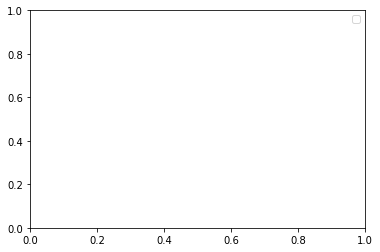

In [764]:
sc = [2.7, 3.252, 3.804, 4.356, 4.908, 5.46]
#sc = [2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0, 5.5, 5.75]
#index = [0, 1, 3, 5, 8, 10]

stats_data = {}

for key, trj in trj_samples.items():
    
    print('dataset #', key)

    # statistics data
    stats_dict = {'energy':[]}
    for ii, (xyz, box) in enumerate(zip(trj['xyz'], trj['box'])):
        print('conf', ii)
        
        a1, ar, a2, f1, fr, f2 = get_stats_EAM_pairdist(xyz, box, sc=sc)

        #print(xyz.shape, box)
        #print('x', a1.shape, rr.shape, np.sum(np.abs(a1)))
        print('x', a1.shape, ar, a1, a2)
        
        stats_dict['energy'].append(np.array([ar, a2, a1]))
        #stats_dict['forces'].append(np.array([fr, f2, f1]))
               # add dataset
            
        #print('conf:', len(traj['xyz']), box.max())
        # plot pair distances - 
        #if ii == 10:
        #    plt.hist(rr.flatten(),100, alpha=1.0,label=key, histtype='step')
        #    plt.xlim(2,6)
        #    plt.ylim(0,1500)
            
    plt.legend()
    stats_data[key] = stats_dict

In [641]:
stats_data['function'] = 'EAM-cubic-spline'
stats_data['hyperparams'] = sc

In [642]:
with open(os.path.join(working, "target_xxx.pickle"), 'wb') as fo:
    pickle.dump(target_data, fo)
    
with open(os.path.join(working, "stats_xxx.pickle"), 'wb') as fo:
    pickle.dump(stats_data, fo)

In [643]:
#%%writefile -a ../src/optimize/optscript.py

from statmechlib.forcefields import sd2_loss, utot_EAM, udif_print
from scipy.optimize import fmin

In [723]:
#%%writefile -a ../src/optimize/optscript.py

# load target data
with open(os.path.join(working, 'target_full'+'.pickle'), 'rb') as fi:
    targ_dict = pickle.load(fi)

# load stats data
with open(os.path.join(working, 'stats_full'+'.pickle'), 'rb') as fi:
    stats_dict = pickle.load(fi)

In [724]:
#%%writefile -a ../src/optimize/optscript.py

# load stats data
with open(os.path.join(working, 'pars_in'+'.pickle'), 'rb') as fi:
    pars_dict = pickle.load(fi)

In [725]:
stats_dict.keys()

dict_keys(['bcc_npt_langevin_300K', 'fcc_npt_langevin_300K', 'vac_npt_langevin_2000K', 'i110_npt_langevin_2000K', 'i111_npt_langevin_2000K', 'screw_111_npt_langevin_2000K', 'bcc_npt_langevin_3700K', 'liq_3700K', 'liq_5000K', 'relax', 'function', 'hyperparams'])

In [726]:
#%%writefile -a ../src/optimize/optscript.py
pars_in = [pars_dict['embed'][0], pars_dict['embed'][2], *pars_dict['pair']]
print(pars_in)

[-0.4093427610992626, 0.0, 0.8307314918975489, 6.306463298847209, 2.569446338927059, -0.21327208205268988, -0.22254590199235236, 0.02984117320348275]


In [727]:
# eliminate fcc and screw dislocation from the 'relax' datasets

#stats_dict['relax']['energy'] = [ x for i, x in enumerate(stats_dict['relax']['energy']) if i in [0, 1, 2, 3, 4, 6] ]

#for key in targ_dict['relax']:
#    if 'type' not in key and 'weight' not in key:
#        print(key, len(targ_dict['relax'][key]))
#        targ_dict['relax'][key] = [ x for i, x in enumerate(targ_dict['relax'][key]) if i in [0, 1, 2, 3, 4, 6] ]
#        print(len(targ_dict['relax'][key]))

In [728]:
# Final scaling and normalization of data
# %load ../src/optimize/optscript.py

# scale energies (subtract energy of an isolated atom)
# determine interaction energy
print(targ_dict['relax']['energy'][0], len(targ_dict['relax']['xyz'][0]))
u_t = targ_dict['relax']['energy'][0]/len(targ_dict['relax']['xyz'][0])
u_e = -8.9 # external energy from atom (experimental)
u_i = u_t - u_e # internal energy per atom (to be subtracted from all atoms)
print(u_t, u_e, u_i)

emin = 0.0
esum = 0.0
isum = 0.0
lemin = 0.0
lesum = 0.0
lisum = 0.0
for key, trj in targ_dict.items():

    for i in range(len(targ_dict[key]['energy'])):
        if 'relax' in key:
            targ_dict[key]['energy'][i] -= u_i*targ_dict[key]['xyz'][i].shape[0]

        enex = targ_dict[key]['energy'][i]/targ_dict[key]['xyz'][i].shape[0]

        if 'fcc' in key:
            esum += enex
            isum += 1.0
            if enex < emin:
                imin = i
                #print(enex)
                emin = enex
                xmin = targ_dict[key]['xyz'][i]
                bmin = targ_dict[key]['box'][i]
                smin = stats_dict[key]['energy'][i]

        if 'liq_5000K' in key:
            lesum += enex
            lisum += 1.0
            if enex < lemin:
                limin = i
                #print(enex)
                lemin = enex
                lxmin = targ_dict[key]['xyz'][i]
                lbmin = targ_dict[key]['box'][i]
                lsmin = stats_dict[key]['energy'][i]
                lnat = targ_dict[key]['xyz'][i].shape[0]

print('Emin', emin, esum/isum)

# temporary fix - set fcc energy at 0K to minimum energy of 300K trajectory
targ_dict['relax']['energy'][1] = emin*targ_dict['relax']['xyz'][1].shape[0]
targ_dict['relax']['xyz'][1] = xmin
targ_dict['relax']['box'][1] = bmin
stats_dict['relax']['energy'][1] = smin

targ_dict['relax']['energy'][5] = lemin*lnat
targ_dict['relax']['xyz'][5] = lxmin
targ_dict['relax']['box'][5] = lbmin
stats_dict['relax']['energy'][5] = lsmin

targ_dict['relax']['energy'][-1] = 0.0
print('OK energies:', targ_dict['relax']['energy'])

-1656.1778 128
-12.9388890625 -8.9 -4.038889062499999
Emin -12.577208333333333 -12.570017735890648
OK energies: [-1139.2, -1358.3385, -1127.1888890625, -1136.4686109375002, -1136.8212109375002, -1309.5592, 0.0]


In [729]:
targ_dict['relax']['weight'] = 30.0
print([targ_dict[k]['weight'] for k in targ_dict])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 30.0]


In [730]:
index = [0, 1, 3, 5, 8, 10]
index = np.array([True if i in index else False for i in range(len(stats_data['hyperparams']))])

In [731]:
def select_nodes(stats_input, index):
    """
    Select only configuration statistics from stats (spline nodes) that are given in index.
    """
    
    stats_select = copy.deepcopy(stats_input)
    
    for key, stats in stats_select.items():
        if type(stats) == dict and 'energy' in stats.keys():
            for i, conf in enumerate(stats['energy']):
                new_conf = np.empty((3, sum(index)), dtype=float)
                new_conf[0] = conf[0][index]
                new_conf[1] = conf[1][index]
                new_conf[2] = conf[2][index]
                stats['energy'][i] = new_conf
                
    stats_select['hyperparams'] = list(np.array(stats_select['hyperparams'])[index])

    return stats_select

In [732]:
stats_opt = select_nodes(stats_dict, index)

In [733]:
stats_opt['hyperparams']

[2.5, 2.75, 3.25, 3.75, 4.5, 5.5]

In [734]:
# Formatting for optimization

# prepare data for fitting
stats = []
target = []
for key in list(targ_dict.keys()):
    stats.append(stats_opt[key])
    target.append(targ_dict[key])

# prepare parameters for fitting
multi_pars = []

pars_in1 = [pars_dict['embed'][0], pars_dict['embed'][2], *pars_dict['pair']]
#multi_pars = [np.array(pars_in)]
pars_in2 = [-1.17194534819, 4.9212636569e-05, 0.0960596087037, 16.9530837862, -1.26438173901, 2.1048867031, -0.912012405654, 0.113324291952]
#multi_pars.append(np.array(pars_in))
pars_in1 = [-0.6169796280549427, 0.00010563526234385224, 0.3044078692520532, 6.65890926803851, -1.1489327923874284, 2.2081284218733765, -1.5236567484357728, 0.21922639345669304]
pars_in2 = [-1.4592640134931716, -3.0515321379039898e-05, -0.06397036119840327, 12.43462333841233, -1.4039556209239763, 2.277361245273334, -1.3383612333938921, 0.35119549556765894]

pars_in1 = [-3.2512467172281996, -0.0003202150380230016, 0.15269806859034524, 11.969935407675626, -0.6164601815938373, 2.2310427435982905, -0.9802667652058299, 0.6418078671434688]
pars_in2 = [-2.445149490918154, -0.00020801983958736083, -0.2640494502785708, 0.204150653694475, -0.8354501676207835, 2.5231913314784125, -1.1085851952767731, 0.5027740347187062,]
pars_in3 = [-0.7440002542627315, 1.3187608684512786e-05, -131.04373074002945, 30.6115049563255, -7.626040158485056, 4.444445847922796, -1.2013317345405128, 0.15543885566625482]
pars_in4 = [-1.7137448204475763, -0.00011755210619538186, -10.1156046958838, 18.032250182295456, -4.981378715695071, 3.688719146265372, -1.1431613580572852, 0.34723353452410854]

pars_in1 = [-2.9376727625275185, -0.00028022535517750524, -0.06998899879559964, 8.988902981345005, -1.133979308034288, 2.484611922799483, -1.0173639391284288, 0.5833969384340463]
pars_in2 = [-2.3436680210936442, -0.0002067565260307982, -134.89037863511976, 27.962504525433765, -4.032672086835333, 3.247698323035168, -0.9987257996581616, 0.4513984121355687]
pars_in3 = [-0.8995317581781127, -1.2233561504472977e-05, -150.5525413026948, 40.17212749365491, -8.477591070776592, 4.582710884516496, -1.1420118895802114, 0.172979770984942]
pars_in4 = [-1.7137448204475763, -0.00011755210619538186, -10.1156046958838, 18.032250182295456, -4.981378715695071, 3.688719146265372, -1.1431613580572852, 0.34723353452410854]

pars_in1 = [-3.004270792293166, -0.000292843788870708, -49.140610378337, 19.78377322180363, -2.1254890071331394, 2.677100169824965, -0.9715996036930384, 0.5849112609684701]

multi_pars.append(np.array(pars_in1))
multi_pars.append(np.array(pars_in2))
multi_pars.append(np.array(pars_in3))
multi_pars.append(np.array(pars_in4))

for _ in range(5):
    pars = np.array(pars_in1)
    pars += np.random.standard_normal(pars.shape)*0.01
    multi_pars.append(pars)

for _ in range(0):
    pars = np.array(pars_in2)
    pars += np.random.standard_normal(pars.shape)*0.01
    multi_pars.append(pars)

for _ in range(0):
    pars = np.array(pars_in3)
    pars += np.random.standard_normal(pars.shape)*0.01
    multi_pars.append(pars)

for _ in range(0):
    pars = np.array(pars_in4)
    pars += np.random.standard_normal(pars.shape)*0.01
    multi_pars.append(pars)
    
for _ in range(0):
    pars = 0.5*(np.array(pars_in1) + np.array(pars_in2))
    pars += np.random.standard_normal(pars.shape)*0.01
    multi_pars.append(pars)

In [765]:
optimal_parameters = []
for i, pars in enumerate(multi_pars):
    sd_ini = sd2_loss(list(pars), stats, target, utot_EAM)
    print('Initial sd2:', sd_ini)
    output = fmin(sd2_loss, list(pars), args=(stats, target, utot_EAM), maxiter=100000, maxfun=100000, disp=0, full_output=1,ftol=1e-6)
    params_uopt = output[0]
    print('Opt #', i, output[1:])
    print("Optimized parameters:")
    print(*params_uopt)
    optimal_parameters.append(tuple([output[1:], params_uopt]))

uuu [-8.14269458e-04 -7.80181258e-04 -7.52373915e-04 -7.20781986e-04
 -6.94223430e-04 -6.68872370e-04 -6.47896943e-04 -6.24177014e-04
 -6.03010651e-04 -5.85958328e-04 -5.68943950e-04 -5.45134453e-04
 -5.08555078e-04 -4.58913829e-04 -3.94017735e-04 -3.09511467e-04
 -2.06994543e-04 -9.26021305e-05  3.73649209e-05  1.64799321e-04
  2.80663661e-04  3.42376507e-04  3.80762862e-04  3.75904026e-04
  3.40352857e-04  2.87787566e-04  2.36327503e-04  1.93073598e-04
  1.52052629e-04  1.09472214e-04  6.25223849e-05  2.62213464e-05
  1.99318890e-05  2.60669928e-05  4.78232883e-05  7.82593246e-05
  1.17269945e-04  1.64169330e-04  2.08201573e-04  2.47217572e-04
  2.62789696e-04  2.47399650e-04  2.21784036e-04  2.06141581e-04
  2.04437810e-04  1.95660527e-04  1.82554397e-04  1.71443356e-04
  1.60051229e-04  1.54243036e-04  1.51646312e-04  1.48965625e-04
  1.58226933e-04  1.64831307e-04  1.75801811e-04  1.93256523e-04
  1.98657249e-04  2.09425806e-04  2.26207027e-04  2.50621532e-04
  2.58799856e-04  2.6

utarg [-1621.6638 -1621.4214 -1621.2506 -1621.0448 -1620.7828 -1620.6709
 -1620.656  -1620.6963 -1620.871  -1621.0917 -1621.3359 -1621.5822
 -1621.8341 -1622.2352 -1622.7072 -1623.0736 -1623.4525 -1623.9179
 -1624.3577 -1624.7514 -1625.1703 -1625.6068 -1626.0262 -1626.4997
 -1627.0207 -1627.5717 -1628.1419 -1628.5938 -1628.9273 -1629.1538
 -1629.1788 -1628.8894 -1628.3904 -1627.6705 -1626.9554 -1626.1819
 -1625.4772 -1624.8717 -1624.268  -1623.6278 -1622.9723 -1622.3732
 -1621.8246 -1621.3564 -1620.9497 -1620.6382 -1620.3663 -1620.0987
 -1619.8853 -1619.8564 -1619.9795 -1620.1587 -1620.3641 -1620.6165
 -1620.857  -1621.0274 -1621.0965 -1621.0657 -1620.878  -1620.6286
 -1620.3008 -1619.9453 -1619.6063 -1619.3237 -1619.0002 -1618.714
 -1618.5531 -1618.4685 -1618.3488 -1618.3761 -1618.5347 -1618.8103
 -1619.1777 -1619.5165 -1619.8484 -1620.0988 -1620.3283 -1620.5493
 -1620.7529 -1620.8606 -1620.9183 -1621.0894 -1621.2183 -1621.3776
 -1621.4723 -1621.5418 -1621.5414 -1621.5462 -1621.4704 -

ustat [-1090.78873875 -1091.35186153 -1091.67267969 -1091.72761726
 -1091.84577952 -1091.84023893 -1091.69175401 -1091.53981383
 -1091.37511584 -1091.17370054 -1091.05071504 -1090.93741328
 -1090.84453095 -1090.89843442 -1091.03218216 -1091.20529465
 -1091.32397635 -1091.22403157 -1091.19498526 -1091.23123989
 -1091.16789334 -1091.0186488  -1090.87091852 -1090.74981803
 -1090.72663503 -1090.62000421 -1090.48339308 -1090.41966247
 -1090.43658645 -1090.36367174 -1090.27588462 -1090.11973605
 -1089.97671173 -1089.95134388 -1090.02732039 -1090.18196946
 -1090.27861286 -1090.44909432 -1090.79841997 -1091.09049547
 -1091.3832183  -1091.61276531 -1091.71031195 -1091.69957757
 -1091.56229274 -1091.34131684 -1090.85219473 -1090.28949843
 -1089.78868644 -1089.49197925 -1089.39634053 -1089.53832214
 -1089.86887454 -1090.30769862 -1090.89740429 -1091.3884264
 -1091.83866127 -1092.3342277  -1092.79742174 -1093.17260615
 -1093.36967583 -1093.53804743 -1093.65592871 -1093.7593189
 -1093.86332654 -109

uuu [-5.11439887e-04 -6.33226956e-04 -7.09163987e-04 -7.39328823e-04
 -7.93053588e-04 -8.19347293e-04 -8.13705632e-04 -7.91042644e-04
 -7.47061443e-04 -6.71914490e-04 -5.85292015e-04 -4.90153695e-04
 -3.88953472e-04 -3.04284116e-04 -2.53644093e-04 -2.12833529e-04
 -1.76984170e-04 -1.14087223e-04 -7.25839718e-05 -6.59855795e-05
 -6.45921769e-05 -5.91803144e-05 -5.78449131e-05 -8.29794974e-05
 -1.13683661e-04 -1.35728969e-04 -1.56396650e-04 -1.98301209e-04
 -2.46842909e-04 -2.67044370e-04 -2.64875551e-04 -2.59025881e-04
 -2.44974049e-04 -2.44815329e-04 -2.61104003e-04 -2.88370122e-04
 -2.98270291e-04 -3.22625787e-04 -3.82436262e-04 -4.40101850e-04
 -4.91751993e-04 -5.15734482e-04 -5.11007758e-04 -4.76225572e-04
 -4.11984409e-04 -3.50858626e-04 -2.46780922e-04 -1.32968127e-04
 -4.42118619e-05 -3.85387693e-06 -1.37640880e-05 -7.95195847e-05
 -1.80896633e-04 -3.02147875e-04 -4.41519363e-04 -5.70426523e-04
 -6.91167919e-04 -8.05314707e-04 -8.95756854e-04 -9.81721058e-04
 -1.05738222e-03 -1.1

ustat [-1198.26871728 -1198.60790557 -1198.98774596 -1199.46842031
 -1199.86110227 -1200.02395402 -1200.04916839 -1199.975774
 -1200.03617417 -1200.23630799 -1200.44674619 -1200.63005292
 -1200.8649377  -1201.11178577 -1201.30442964 -1201.51256972
 -1201.55747552 -1201.3990111  -1201.19736217 -1200.85817536
 -1200.31441354 -1199.71776074 -1199.18680439 -1198.64306767
 -1198.11330884 -1197.67319967 -1197.35881317 -1197.00816041
 -1196.69286992 -1196.3648294  -1196.10892488 -1195.91137953
 -1195.8143865  -1195.77334609 -1195.69333978 -1195.81085816
 -1196.12840041 -1196.56713445 -1197.04771785 -1197.60872958
 -1198.23665319 -1198.96356108 -1199.70628351 -1200.58019594
 -1201.57308824 -1202.61635077 -1203.44324001 -1204.19397732
 -1204.80823652 -1205.40693159 -1205.80492796 -1206.12404262
 -1206.35207306 -1206.41448586 -1206.37817554 -1206.17711804
 -1205.70652511 -1205.19332379 -1204.64422111 -1204.01907511
 -1203.33766603 -1202.61074344 -1201.81190466 -1200.88371941
 -1200.13171689 -119

uuu [-6.16716968e-04 -6.33398323e-04 -6.22204982e-04 -6.07544454e-04
 -5.67596466e-04 -4.87588941e-04 -3.97610053e-04 -2.83135640e-04
 -2.18643351e-04 -1.91930672e-04 -2.02476741e-04 -2.26219183e-04
 -2.77051042e-04 -3.57681434e-04 -4.47553588e-04 -5.52049043e-04
 -6.12166623e-04 -6.15832782e-04 -5.90297008e-04 -5.44520715e-04
 -4.56426184e-04 -3.35712285e-04 -2.40839636e-04 -1.64811386e-04
 -9.48082883e-05 -8.07723419e-05 -1.15293531e-04 -1.30334987e-04
 -1.34405935e-04 -1.21985447e-04 -1.34670074e-04 -1.38712747e-04
 -1.42422582e-04 -1.27453525e-04 -8.81110299e-05 -7.60851431e-05
 -1.12542219e-04 -1.93299790e-04 -3.15205384e-04 -4.63351057e-04
 -6.28558446e-04 -8.03825583e-04 -9.72666988e-04 -1.13068681e-03
 -1.29254973e-03 -1.43714929e-03 -1.51361823e-03 -1.55818204e-03
 -1.60550757e-03 -1.65953612e-03 -1.68419398e-03 -1.69833450e-03
 -1.69769880e-03 -1.66919012e-03 -1.60570555e-03 -1.51101244e-03
 -1.37117390e-03 -1.22742976e-03 -1.06551226e-03 -8.65681959e-04
 -6.36951490e-04 -3.8

eee [1.000668   1.00069158 1.00068699 1.00068014 1.00064555 1.0005665
 1.00047454 1.00035523 1.00028835 1.00026165 1.00027337 1.00029895
 1.00035475 1.00044262 1.0005375  1.0006455  1.00070476 1.00070233
 1.00066851 1.00061327 1.00051276 1.00037839 1.00027183 1.0001854
 1.00010557 1.0000828  1.00011071 1.00011635 1.00010908 1.00008503
 1.00008761 1.00008311 1.00008111 1.00006128 1.00001708 1.00000471
 1.00004431 1.00012849 1.00025341 1.00040383 1.00057281 1.00075219
 1.00092662 1.00109514 1.00127485 1.00144208 1.00154021 1.00160593
 1.001671   1.0017416  1.0017789  1.00180461 1.00181431 1.00179235
 1.00173297 1.00163796 1.00149303 1.00134117 1.00116763 1.0009536
 1.00070758 1.00043578 1.00014678 0.9998377  0.9995656  0.99935554
 0.99919118 0.99908347 0.99904027 0.99905632 0.99909756 0.99916966
 0.99926668 0.99933851 0.99942102 0.99956139 0.99972384 0.99988807
 1.00003626 1.00013272 1.00019551 1.00024581 1.00028083 1.00029992
 1.00030172 1.00029387 1.00032751 1.000355   1.00035901 1.000

 1.00016404 1.00020428]
uuu [-4.23840663e-04 -4.52439463e-04 -4.99036984e-04 -5.43490718e-04
 -5.84096524e-04 -6.23296769e-04 -6.71495964e-04 -7.18195619e-04
 -7.59533666e-04 -7.68563101e-04 -7.01565657e-04 -5.93132107e-04
 -4.98555113e-04 -4.58990946e-04 -4.36394909e-04 -4.01286221e-04
 -3.93163969e-04 -4.15760562e-04 -4.57438336e-04 -5.11841426e-04
 -5.79102274e-04 -6.50423872e-04 -7.47035222e-04 -8.64387441e-04
 -9.83390050e-04 -1.09991772e-03 -1.21923058e-03 -1.30759811e-03
 -1.37821141e-03 -1.42519994e-03 -1.42392322e-03 -1.39277224e-03
 -1.31238518e-03 -1.18720384e-03 -1.04543659e-03 -8.76453565e-04
 -7.07729542e-04 -5.49432614e-04 -3.98467272e-04 -2.44169601e-04
 -7.97795881e-05  6.79591630e-05  1.69059042e-04  2.44020478e-04
  3.15458819e-04  3.63506171e-04  4.08637154e-04  4.86809960e-04
  5.42455521e-04  5.74223707e-04  5.90288990e-04  5.82190376e-04
  5.75191359e-04  5.68072383e-04  5.48926840e-04  5.36968720e-04
  5.23770677e-04  4.72767845e-04  4.21823928e-04  3.44248009e-

utarg [-1606.2752 -1606.552  -1606.6886 -1606.6629 -1606.6647 -1606.6014
 -1606.469  -1606.3678 -1606.2812 -1606.2111 -1606.2446 -1606.2884
 -1606.3597 -1606.5464 -1606.7347 -1606.9392 -1607.0781 -1607.0606
 -1607.0745 -1607.0963 -1607.0227 -1606.8785 -1606.7298 -1606.5596
 -1606.4792 -1606.3338 -1606.1614 -1606.0285 -1605.9614 -1605.8505
 -1605.7633 -1605.6221 -1605.509  -1605.4859 -1605.5274 -1605.6304
 -1605.7118 -1605.8392 -1606.0803 -1606.2782 -1606.4813 -1606.6737
 -1606.7861 -1606.859  -1606.8697 -1606.8019 -1606.562  -1606.2624
 -1605.9748 -1605.7874 -1605.6978 -1605.7326 -1605.874  -1606.0858
 -1606.4085 -1606.658  -1606.8907 -1607.1828 -1607.4799 -1607.6901
 -1607.7418 -1607.7517 -1607.7075 -1607.6558 -1607.5978 -1607.5625
 -1607.4327 -1607.1408 -1606.7643 -1606.2953 -1605.8783 -1605.4948
 -1605.2307 -1605.0498 -1604.9751 -1605.0512 -1605.1595 -1605.3467
 -1605.6799 -1606.0038 -1606.3503 -1606.8018 -1607.2025 -1607.5713
 -1607.937  -1608.2946 -1608.5563 -1608.7369 -1608.9032 

 -1308.64034738 -1308.71676386]
eee [1.00533184 1.00514885 1.00496532 1.00477357 1.00458731 1.00443042
 1.00427532 1.00409726 1.00394232 1.0038046  1.00364688 1.00348373
 1.00330878 1.00311574 1.0029131  1.00268335 1.00241828 1.0021386
 1.00181401 1.00148605 1.00116762 1.0009173  1.00067103 1.0004667
 1.00031089 1.00017312 1.0000395  0.99989525 0.99977224 0.9996498
 0.99951458 0.99935329 0.99914576 0.99894325 0.9987151  0.9984947
 0.99826907 0.99803658 0.99781654 0.99759011 0.99739513 0.99725685
 0.99713862 0.99701371 0.99687806 0.99677314 0.99668209 0.99657354
 0.99647594 0.99636835 0.99625949 0.99614574 0.99603026 0.99592041
 0.99580126 0.99566633 0.99556704 0.99547816 0.99542189 0.99535812
 0.99532764 0.99528738 0.99526007 0.99523423 0.99521289 0.99518153
 0.99516797 0.99516795 0.99516589 0.9951906  0.99522842 0.99526197
 0.99530211 0.99535647 0.99542199 0.99548855 0.99554856 0.99558743
 0.99563151 0.99571168 0.99580393 0.99591791 0.99605821 0.99620542
 0.99633754 0.99645887 0.99654

uuu [-3.87500244e-03 -3.77970772e-03 -3.71271857e-03 -3.66295257e-03
 -3.60868496e-03 -3.51139777e-03 -3.37992092e-03 -3.17670058e-03
 -2.94780345e-03 -2.68188249e-03 -2.46345168e-03 -2.29665682e-03
 -2.12823322e-03 -1.96067173e-03 -1.74477621e-03 -1.53932811e-03
 -1.34956908e-03 -1.15817652e-03 -9.56481528e-04 -7.37725330e-04
 -5.56245665e-04 -4.02650089e-04 -2.59764308e-04 -1.10245429e-04
  5.59405187e-05  2.37584177e-04  4.58413144e-04  6.67837808e-04
  8.66360316e-04  1.02928991e-03  1.16778656e-03  1.27130435e-03
  1.33562844e-03  1.32560300e-03  1.26287847e-03  1.14375570e-03
  9.58222187e-04  7.58790465e-04  5.39612186e-04  3.17817934e-04
  1.07695094e-04 -9.24141161e-05 -2.65186639e-04 -3.90052186e-04
 -4.66377758e-04 -5.58413527e-04 -6.36285046e-04 -6.62799944e-04
 -6.39429470e-04 -5.73504592e-04 -4.91672003e-04 -3.93019024e-04
 -3.26056553e-04 -3.19361299e-04 -2.96191707e-04 -2.42066153e-04
 -2.04907884e-04 -1.76033355e-04 -1.18438646e-04 -2.24764191e-05
  1.12807031e-04  2.7

ustat [-674.01127852 -674.19826819 -674.27286797 -674.42353277 -674.53864053
 -674.44731317 -674.22976219 -674.05195962 -673.82894642 -673.53850653
 -673.21272028 -672.80116662 -672.36207188 -671.9456942  -671.60788043
 -671.09751654 -670.72585435 -670.54639505 -670.46536153 -670.459521
 -670.43969008 -670.41524537 -670.20166108 -670.04105173 -669.98014044
 -670.00760388 -670.33264877 -670.78970395 -671.38379434 -671.95152877
 -672.44182865 -672.86183467 -673.27543457 -673.58918845 -673.83259682
 -673.90226062 -673.80809319 -673.63720629 -673.60313642 -673.50893734
 -673.42873206 -673.20915008 -673.13275375 -673.33438404 -673.60604577
 -673.89636965 -674.19764938 -674.43302555 -674.60910404 -674.92389153
 -675.08639676 -675.13396683 -675.07616017 -674.97378895 -674.70055354
 -674.23703584 -673.90513835 -673.50006449 -673.01728047 -672.38103935
 -671.61992601 -670.75477224 -669.82307837 -668.95857467 -668.0628439
 -667.14548576 -666.27625855 -665.52576982 -664.97641568 -664.81251464
 -6

 1.00479177]
uuu [-7.54172091e-03 -7.40278999e-03 -7.25766319e-03 -7.06260713e-03
 -6.91405120e-03 -6.85283364e-03 -6.82068930e-03 -6.74805952e-03
 -6.59975405e-03 -6.43704218e-03 -6.24912671e-03 -5.99989169e-03
 -5.72081028e-03 -5.38449972e-03 -5.04041498e-03 -4.74228902e-03
 -4.45867666e-03 -4.15033266e-03 -3.80394510e-03 -3.48623300e-03
 -3.19380353e-03 -2.92165343e-03 -2.72072364e-03 -2.55376486e-03
 -2.42499898e-03 -2.28305908e-03 -2.16093344e-03 -2.09557862e-03
 -2.05229240e-03 -2.02824131e-03 -2.00179313e-03 -1.98162428e-03
 -1.95714680e-03 -1.99074558e-03 -2.04019862e-03 -2.12293325e-03
 -2.22240228e-03 -2.28414918e-03 -2.31551931e-03 -2.40246343e-03
 -2.49267274e-03 -2.64840022e-03 -2.76688209e-03 -2.91496658e-03
 -3.09209282e-03 -3.26185446e-03 -3.42285904e-03 -3.52668476e-03
 -3.64565332e-03 -3.70713501e-03 -3.77225348e-03 -3.85722902e-03
 -3.96883789e-03 -4.11759185e-03 -4.29913550e-03 -4.45040110e-03
 -4.46666731e-03 -4.42616046e-03 -4.41969908e-03 -4.38655188e-03
 -4.3879

utarg [-1651.655  -1651.6781 -1651.6934 -1651.6855 -1651.6602 -1651.6253
 -1651.5909 -1651.5496 -1651.5014 -1651.4397 -1651.3792 -1651.3166
 -1651.2513 -1651.1991 -1651.1533 -1651.1011 -1651.0621 -1651.0213
 -1651.0046 -1651.0011 -1651.0199 -1651.0488 -1651.0875 -1651.1257
 -1651.1586 -1651.1909 -1651.2304 -1651.255  -1651.2614 -1651.2592
 -1651.2519 -1651.2321 -1651.2132 -1651.1966 -1651.1672 -1651.1317
 -1651.107  -1651.0904 -1651.0831 -1651.0771 -1651.0875 -1651.105
 -1651.1241 -1651.148  -1651.1693 -1651.17   -1651.1612 -1651.1432
 -1651.1332 -1651.1333 -1651.147  -1651.1551 -1651.1647 -1651.1613
 -1651.1488 -1651.1293 -1651.1022 -1651.0842 -1651.0669 -1651.0672
 -1651.0579 -1651.0588 -1651.0763 -1651.1102 -1651.1532 -1651.207
 -1651.2601 -1651.3163 -1651.3789 -1651.4397 -1651.5014 -1651.55
 -1651.5774 -1651.5939 -1651.5824 -1651.543  -1651.4921 -1651.4388
 -1651.3717 -1651.2901 -1651.2183 -1651.1468 -1651.0806 -1651.0123
 -1650.9502 -1650.8775 -1650.8147 -1650.7506 -1650.6954 -165

uuu [ 1.53387910e-03  1.49063470e-03  1.43658983e-03  1.38426286e-03
  1.32717665e-03  1.28303617e-03  1.23292539e-03  1.17493845e-03
  1.12565536e-03  1.07877363e-03  1.02179022e-03  9.72192972e-04
  9.36524608e-04  9.11154081e-04  9.04560029e-04  9.14374382e-04
  9.33782125e-04  9.64144337e-04  9.95555024e-04  1.02143455e-03
  1.03511159e-03  1.00122716e-03  9.33329693e-04  8.20992849e-04
  6.86771393e-04  5.35592846e-04  3.87875186e-04  2.46364617e-04
  1.18770978e-04 -1.14589967e-05 -1.55971513e-04 -2.97985513e-04
 -4.18921642e-04 -5.18051989e-04 -6.05732332e-04 -6.76020057e-04
 -7.35461970e-04 -7.85734144e-04 -8.33956655e-04 -8.93394793e-04
 -9.72590579e-04 -1.06992978e-03 -1.17250672e-03 -1.26389999e-03
 -1.33964105e-03 -1.41037719e-03 -1.48007163e-03 -1.55636575e-03
 -1.62745366e-03 -1.69465543e-03 -1.75730159e-03 -1.82185370e-03
 -1.86842855e-03 -1.91645183e-03 -1.96272900e-03 -2.00793748e-03
 -2.05326355e-03 -2.08481198e-03 -2.08893252e-03 -2.08446164e-03
 -2.08752018e-03 -2.1

utarg [-1606.2752 -1606.552  -1606.6886 -1606.6629 -1606.6647 -1606.6014
 -1606.469  -1606.3678 -1606.2812 -1606.2111 -1606.2446 -1606.2884
 -1606.3597 -1606.5464 -1606.7347 -1606.9392 -1607.0781 -1607.0606
 -1607.0745 -1607.0963 -1607.0227 -1606.8785 -1606.7298 -1606.5596
 -1606.4792 -1606.3338 -1606.1614 -1606.0285 -1605.9614 -1605.8505
 -1605.7633 -1605.6221 -1605.509  -1605.4859 -1605.5274 -1605.6304
 -1605.7118 -1605.8392 -1606.0803 -1606.2782 -1606.4813 -1606.6737
 -1606.7861 -1606.859  -1606.8697 -1606.8019 -1606.562  -1606.2624
 -1605.9748 -1605.7874 -1605.6978 -1605.7326 -1605.874  -1606.0858
 -1606.4085 -1606.658  -1606.8907 -1607.1828 -1607.4799 -1607.6901
 -1607.7418 -1607.7517 -1607.7075 -1607.6558 -1607.5978 -1607.5625
 -1607.4327 -1607.1408 -1606.7643 -1606.2953 -1605.8783 -1605.4948
 -1605.2307 -1605.0498 -1604.9751 -1605.0512 -1605.1595 -1605.3467
 -1605.6799 -1606.0038 -1606.3503 -1606.8018 -1607.2025 -1607.5713
 -1607.937  -1608.2946 -1608.5563 -1608.7369 -1608.9032 

ustat [-1372.53598407 -1372.87582987 -1373.26145229 -1373.75344863
 -1374.15505518 -1374.31827888 -1374.33794683 -1374.25693808
 -1374.31000393 -1374.50596399 -1374.70910626 -1374.88190869
 -1375.1116099  -1375.35750981 -1375.55122453 -1375.76262704
 -1375.80565591 -1375.63845681 -1375.43043865 -1375.08771288
 -1374.54711225 -1373.96226562 -1373.45012639 -1372.92879634
 -1372.42828505 -1372.01417999 -1371.72197883 -1371.38602888
 -1371.08891768 -1370.78503775 -1370.55310896 -1370.37982065
 -1370.30937451 -1370.29275482 -1370.23684313 -1370.37553046
 -1370.71225278 -1371.1642839  -1371.65426669 -1372.22422858
 -1372.86499249 -1373.60660551 -1374.36064845 -1375.25335885
 -1376.26303427 -1377.32517093 -1378.16780162 -1378.93648154
 -1379.56833726 -1380.18674883 -1380.60423391 -1380.94634707
 -1381.19366921 -1381.27245731 -1381.25116173 -1381.06691774
 -1380.61186869 -1380.1180657  -1379.58643431 -1378.977756
 -1378.31509202 -1377.6049952  -1376.8193053  -1375.90616345
 -1375.1675933  -137

 -1605.7776 -1604.9593 -1604.0718 -1603.212 ]
ustat [-1015.65670776 -1016.2444529  -1016.58297191 -1016.64760327
 -1016.77003071 -1016.76614369 -1016.61349817 -1016.45716455
 -1016.29579759 -1016.10206723 -1015.98608003 -1015.88807781
 -1015.81320811 -1015.8852554  -1016.04304829 -1016.24235928
 -1016.38767022 -1016.30895581 -1016.30003704 -1016.35065465
 -1016.29383696 -1016.14700303 -1016.00057584 -1015.87861912
 -1015.85353294 -1015.74381357 -1015.60375738 -1015.53248818
 -1015.54310984 -1015.46877714 -1015.38262221 -1015.22420708
 -1015.0796738  -1015.05342175 -1015.1311086  -1015.28557862
 -1015.38078983 -1015.5497694  -1015.89579377 -1016.17929934
 -1016.46726643 -1016.69298083 -1016.78855508 -1016.77058653
 -1016.6224364  -1016.3843656  -1015.87131033 -1015.28702156
 -1014.76499551 -1014.45199807 -1014.34285561 -1014.47367055
 -1014.79972193 -1015.23378102 -1015.8215592  -1016.30771418
 -1016.74892503 -1017.23513979 -1017.69367349 -1018.06748719
 -1018.26236788 -1018.43201173 -1

ustat [-748.12569069 -747.60017274 -747.18820014 -746.93361999 -746.46163429
 -745.46994914 -744.5062304  -743.36193594 -741.94673015 -740.62464426
 -739.37890607 -738.49427579 -737.39603015 -736.16387665 -735.07694209
 -733.66232496 -732.05563251 -730.67837333 -729.70324886 -729.08177572
 -728.97470819 -728.96750955 -729.27269104 -729.40984813 -729.01424754
 -728.58967922 -728.09934061 -727.86696786 -727.95252464 -728.06088596
 -728.501829   -728.95639394 -729.2528199  -729.65661892 -730.09158654
 -730.41111142 -730.13457129 -729.83141989 -729.38022667 -729.24076891
 -729.43658492 -730.07972012 -731.21313058 -732.51591093 -733.73363213
 -734.72775412 -735.86326486 -737.23697564 -738.91762137 -740.64146281
 -742.35117682 -743.5966015  -744.25932017 -744.4687218  -744.42499868
 -743.94765683 -743.46407845 -742.91017329 -742.1581669  -741.07517656
 -740.14510987 -739.56922178 -739.29807493 -739.36744086 -739.48485568
 -739.50715768 -739.25528405 -738.55624748 -737.62880332 -736.68719185


KeyboardInterrupt: 

In [657]:
with open(os.path.join(working, 'output_many.pickle'), 'rb') as fi:
    optimal_list = pickle.load(fi)

if type(optimal_list) != list:
    optimal_list = [optimal_list]

optimal_list.append(optimal_parameters)

with open(os.path.join(working, 'output_many.pickle'), 'wb') as fo:
    pickle.dump(optimal_list, fo)

No handles with labels found to put in legend.


6


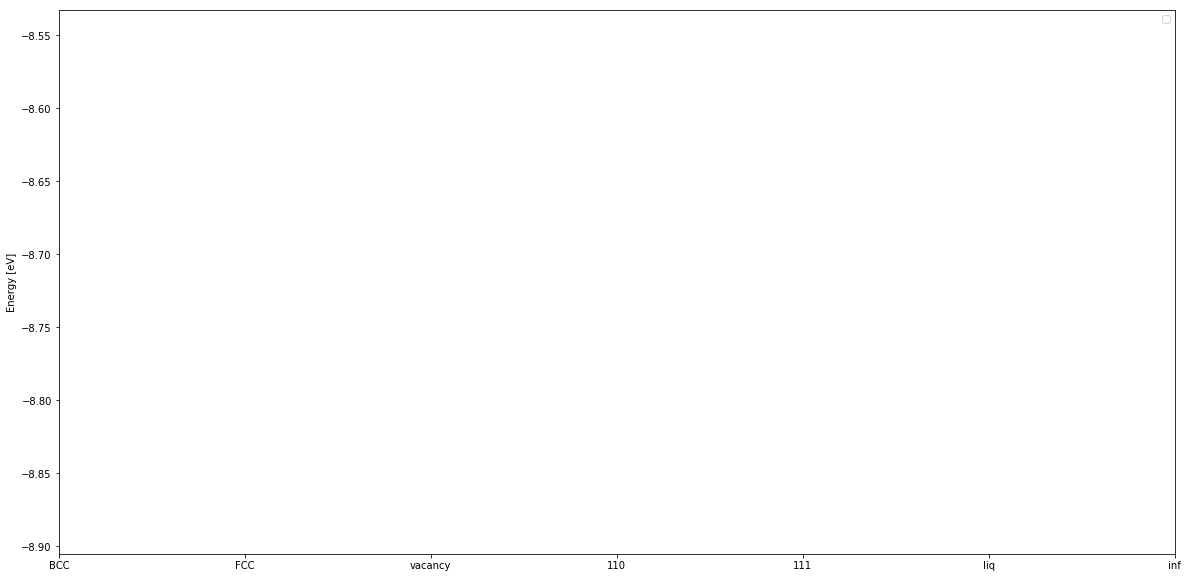

In [736]:
plt.figure(figsize=(20,10))

nat = np.array([len(x) for x in targ_dict['relax']['xyz']])[:-1]
print(len(nat))

for i, params_uopt in enumerate(optimal_parameters):
    if params_uopt[0][0] > 3e-6:
        continue
    print(i, params_uopt[0][0])
    print(params_uopt[1])

    opti_out, targ_out = udif_print(params_uopt[1], stats, target, utot_EAM)
    plt.title('Selected configurations at 0K')
    if i == 0:
        print('Targ:', targ_out[-1][:-1])
        #nat = np.array([len(x) for x in targ_dict['relax']['xyz']])
        print(len(np.array(targ_out[-1][:-1]))/nat)
        plt.plot(np.array(targ_out[-1][:-1])/nat, 'o', label='target'+str(i), markersize=10)

    #if i != 0 and i != 27:
    #    continue
        
    #print('Opti:', [o for o in opti_out[-1][:-1]])
    plt.plot(np.array([o for o in opti_out[-1][:-1]])/nat, 'x--', label='optimized '+str(i))
#    else:
#        plt.plot([o for o in opti_out[-1][:-1]], 'x--', label='optimized '+str(i))
#        plt.plot(targ_out[-1][:-1], 'o', markersize=10)

plt.xticks([0, 1, 2, 3, 4, 5, 6], ['BCC','FCC', 'vacancy','110','111','liq','inf'])
plt.ylabel('Energy [eV]')
#plt.ylim(-1145, -1136)
plt.ylim(-8.905, -8.533)
plt.legend()

0 2.4643998973402667e-06
1 2.057922979348631e-06
2 7.326245746534736e-06
3 3.217850381650512e-06
4 2.444163490627411e-06
5 3.2080761828815534e-06
6 1.3673328760171909e-05
7 6.527748395075841e-06
8 3.216656851111966e-05
9 2.6600773970168575e-06
10 4.637822797250685e-06
11 4.007535777379554e-06
12 3.2706475730509594e-06
13 4.387028372049583e-06
14 1.9272733351947695e-05
15 1.0927657315215259e-05
16 4.786660329642195e-06
17 8.502348023260957e-06
18 8.971369953805196e-06
19 2.3652192254581873e-05
20 2.09975694968802e-05
21 6.577234310396308e-06
22 4.32817803736593e-06
23 3.7311625513009874e-06
24 2.665862906036206e-06
25 3.5372065648288203e-06
26 1.117679955429139e-05
27 2.712361104730843e-06
28 3.524136077501471e-06


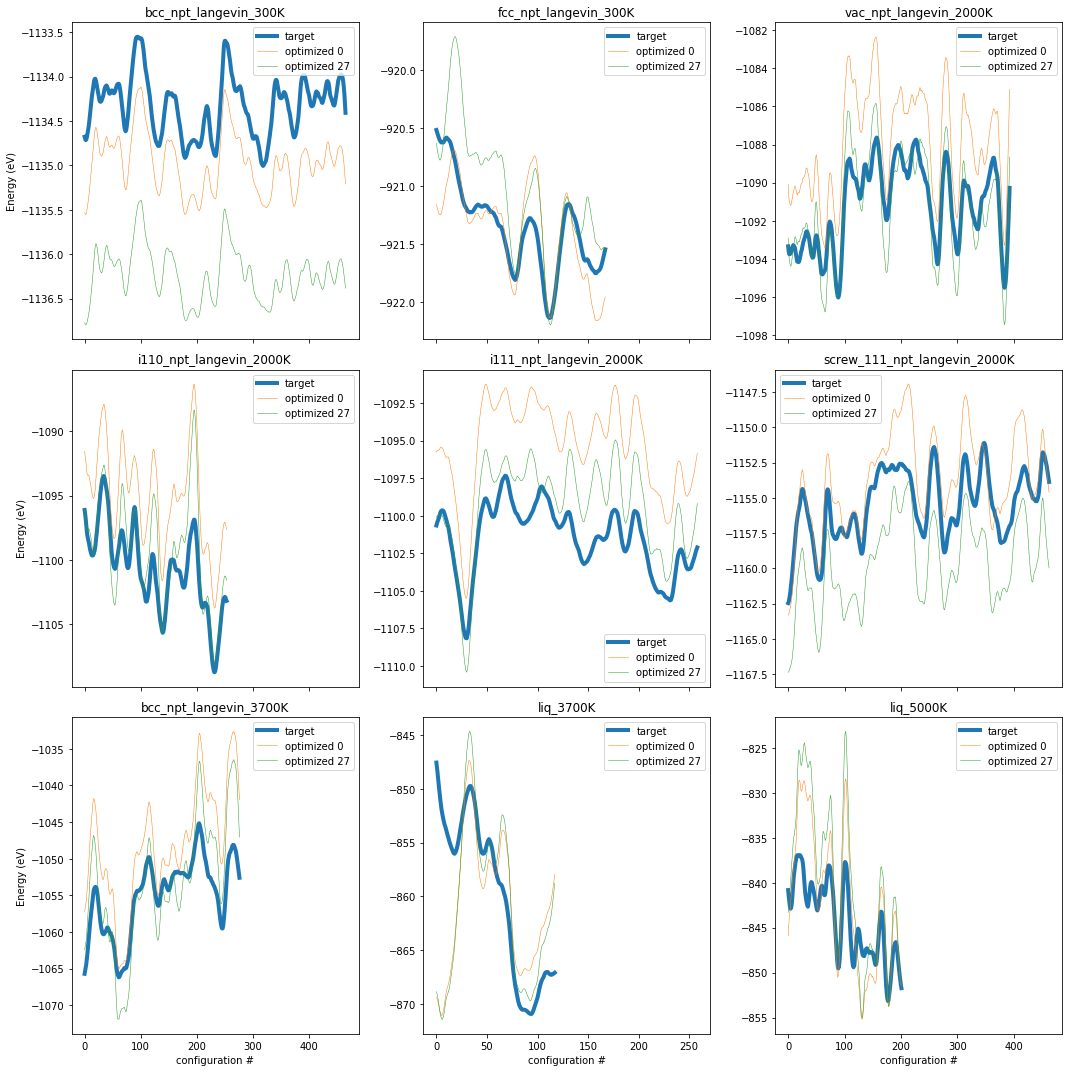

In [702]:
names = ['bcc_npt_langevin_300K',
            'fcc_npt_langevin_300K',
            'vac_npt_langevin_2000K',
            'i110_npt_langevin_2000K',
            'i111_npt_langevin_2000K',
            'screw_111_npt_langevin_2000K',
            'bcc_npt_langevin_3700K',
            'liq_3700K',
            'liq_5000K']

#x = np.array([-1.17194534819, 4.9212636569e-05, 0.0960596087037, 16.9530837862, -1.26438173901, 2.1048867031, -0.912012405654, 0.113324291952])
#optimal_parameters.append(tuple([[3.2627338939720861e-06, 0.0], x]))

fig, axes = plt.subplots(3, 3, sharex='col', figsize=(15,15))

for ip, params_uopt in enumerate(optimal_parameters):

    print(ip, params_uopt[0][0])
    opti_out, targ_out = udif_print(params_uopt[1], stats, target, utot_EAM)

    for i, (tar, opt) in enumerate(zip(targ_out[:-1], opti_out[:-1])):
        x, y = divmod(i, 3)
        tar = np.array(tar)
        opt = np.array(opt)
        #print(names[i], (tar.mean() - opt.mean())/target[i]['xyz'][0].shape[0])
        #opt += tar.mean() - opt.mean()
        #print(ip)
        if ip == 0:#len(optimal_parameters)-1:
            axes[x,y].plot(tar, '-', label='target', linewidth=4)

        if params_uopt[0][0] > 3e-6:
            continue
        if ip != 0 and ip != 27:
            continue
        if ip == 0:#len(optimal_parameters)-1:
            axes[x,y].plot(opt, '-', label='optimized '+str(ip), linewidth=0.5)
        
            if y == 0:
                axes[x,y].set_ylabel('Energy (eV)')
            else:
                axes[x,y].set_ylabel('')

            if x == 2:
                axes[x,y].set_xlabel('configuration #')
            else:
                axes[x,y].set_xlabel('')

            axes[x,y].set_title(names[i])
        else:
            if ip == 0:
                axes[x,y].plot(opt, '-', label='optimized '+ str(ip), linewidth=3)
            else:
                axes[x,y].plot(opt, '-', label='optimized '+ str(ip), linewidth=0.5)
            axes[x,y].set_title(names[i])

        
        axes[x,y].legend()

        
fig.tight_layout()

dataset # bcc_npt_langevin_300K
dataset # fcc_npt_langevin_300K
dataset # vac_npt_langevin_2000K
dataset # i110_npt_langevin_2000K
dataset # i111_npt_langevin_2000K
dataset # screw_111_npt_langevin_2000K
dataset # bcc_npt_langevin_3700K
dataset # liq_3700K
dataset # liq_5000K
dataset # relax


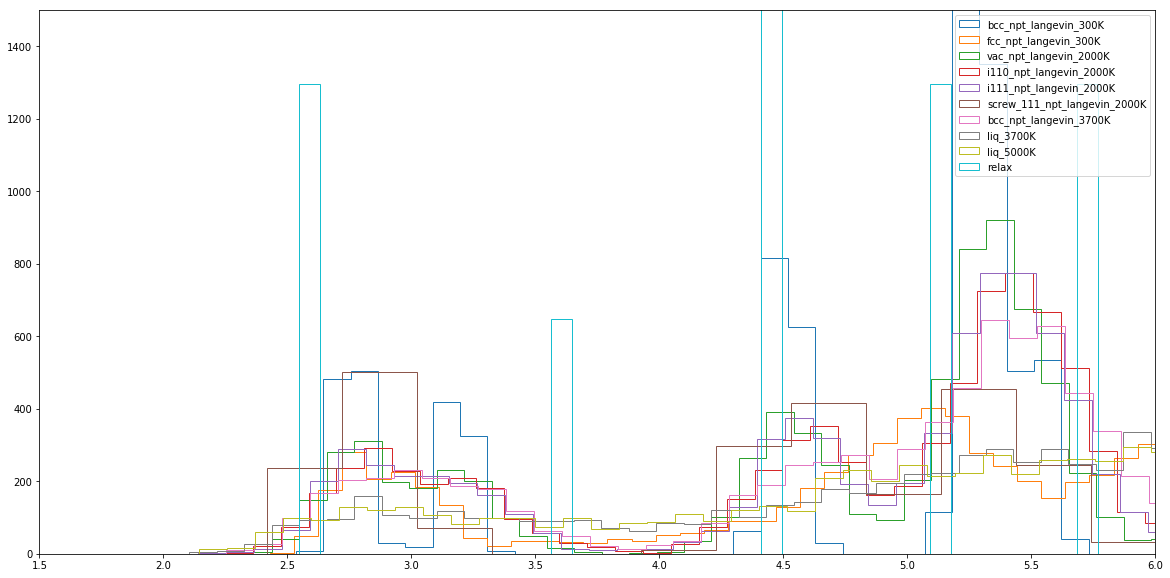

In [669]:
plt.figure(figsize=(20,10))

for key, trj in trj_samples.items():
    
    print('dataset #', key)

    # statistics data
    for ii, (xyz, box) in enumerate(zip(trj['xyz'], trj['box'])):
        if ii > 1:
            break
                    
        rr, rx = pair_dist(xyz, box)

        if ii == 1:
            plt.hist(rr.flatten(),100, alpha=1.0,label=key, histtype='step')
            plt.xlim(1.5,6)
            plt.ylim(0,1500)
            
    plt.legend()

In [703]:
f_spline = lambda r, aa, kk: sum([a*(rk - r)**3 for a, rk in zip(aa, kk) if r < rk and r > 0.01])

# electronic density function (cubic splines)
#rho = lambda r, a, k: sum([c*(p - r)**3 for c, p in zip(a, k) if r < p])

rho = f_spline

# embedding function
F = lambda d, a: a[0]*d**0.5 + a[1]*d + a[2]*d**2

# pair potential function (same spline form as electronic density)
V = rho

V = lambda r, aa, cc: sum([a*(rc - r)**3 for a, rc in zip(aa, cc) if r < rc])

# Embedding function. Parameters: electronic density (d), coefficients for 1/2, 1, and 2 powers of density
F = lambda d, a: a[0]*d**0.5 + a[1]*d + a[2]*d**2

# Cohesive potential (cubic splines - same form as V)
phi = V

In [704]:
rho_a = [1.0]
rho_r = [stats_opt['hyperparams'][-1]]

pair_a = pars_in1[2:]
pair_r = stats_opt['hyperparams']

many_a = [pars_in[0], 0.0, pars_in[1]]

In [705]:
# Ranges of densities and separations

nr = 5000
rcut = stats_opt['hyperparams'][-1]
dr = rcut/nr

rhomax = 12.0*phi(1.5, rho_a, rho_r)
print('rhomax:', rhomax)
#rhomax = 1000.0
nrho = 5000
drho = rhomax/nrho

ri = 1.0
ro = 2.0

# W properties
na = 74
ma = 183.84
lc = 3.1653
alat = 'bcc'

# System composition
n_el = 1
el_name = ['W']

rhomax: 768.0


In [706]:
def u_trans(r, unucl, ueq, ri=1.0, ro=2.0):
    """Transition between the core and equillibrium potentials"""
    if r < ri:
        return unucl
    elif r < ro:
        x = (ro + ri - 2*r)/(ro - ri)
        eta = 3/16*x**5 - 5/8*x**3 + 15/16*x + 1/2
        return ueq + eta*(unucl - ueq)
    else:
        return ueq

In [707]:
from statmechlib.forcefields import u_core

# prepare lists of values
dens = np.linspace(0., rhomax-drho, nrho, endpoint=True)
r = np.linspace(0., rcut-dr, nr, endpoint=True)
r2 = np.linspace(0., rcut, 201)

fembd = [F(d, many_a) for d in dens] # W
edens = np.array([phi(x, rho_a, rho_r) for x in r])

# 1. Cubic spline for r > r_o
f_outer = [V(x, pair_a, pair_r) for i, x in enumerate(r)]
# 2. Repulsive core for r < r_i (precalculate up to r_o)
f_inner = [0.0] + [u_core(x) for x in r[1:]]
# 3. Transition region for r_i < r < r_o
fpair = [x*u_trans(x, f_inner[i], f_outer[i]) for i, x in enumerate(r)]
#fpair = f_outer

In [708]:
# LAMMPS format
pot_path = '../sim/potentials'

with open(os.path.join(pot_path, 'W_lvnew.eam.fs'), 'w') as fo:
    
    # Comment section
    fo.write('Comment 1\n')
    fo.write('Comment 2\n')
    fo.write('Comment 3\n')
    
    # Number of elements
    fo.write(f"{n_el:5d} ")
    for i in range(n_el):
        fo.write(f"{el_name[i]:2}")
    fo.write("\n")
    
    # number of grid points, step size, and cutoff
    fo.write(f"{nrho:5d}{drho:24.16e}{nr:5d}{dr:24.16e}{rcut:24.16e}\n")
    
    # atomic number, mass, lattice size, lattice type
    fo.write(f"{na:5d} {ma:14.4f} {lc:14.4f} {alat:10}\n")
    
    # Embeding function
    for i in range(nrho//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fembd[i*4:i*4+4]))
    
    # Electronic density
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*edens[i*4:i*4+4]))
        
    # Pair potential
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fpair[i*4:i*4+4]))